# Importacion de librerias

In [ ]:
#Exportamos los paquetes que vamos a usar

# Tratamiento de datos
# =============================================================================
import numpy as np
import pandas as pd
import missingno as msno
from datetime import datetime, date
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sbn

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind         
import statsmodels.stats.api as sms 
from scipy import stats 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from statsmodels.stats.outliers_influence import reset_ramsey



# Para acceder al dataset
# ==============================================================================
from google.colab import auth

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials

# Data set Marketing

In [ ]:
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id':'1d2__B3OJwyXXE3VU74P0T_rfONbLsHZb'})
myfile.GetContentFile('marketing.csv')

#https://drive.google.com/file/d/1d2__B3OJwyXXE3VU74P0T_rfONbLsHZb/view?usp=sharing

In [ ]:
#Visualizamos los datos
df_marketing = pd.read_csv('marketing.csv',encoding='latin-1')

N = 5
df_marketing.sample(N)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
502,2549,1983,PhD,Together,"$21,840.00",1,0,7/21/13,80,17,0,9,0,0,1,1,1,0,3,9,0,0,0,0,0,0,0,SP
325,1618,1965,Graduation,Together,"$56,046.00",0,0,1/2/2013,9,577,0,64,0,0,51,2,10,1,8,8,1,0,0,0,0,1,0,GER
929,4607,1959,Graduation,Together,"$71,367.00",0,0,8/23/13,24,227,23,389,42,21,75,1,4,5,7,2,0,0,0,0,0,0,0,SP
1580,7842,1968,Graduation,Single,"$36,065.00",1,1,3/31/13,54,18,7,34,10,2,3,3,3,0,3,8,0,0,0,0,0,0,0,SP
1942,9888,1969,Graduation,Together,"$68,695.00",0,0,6/25/14,3,458,81,356,106,50,40,1,4,4,7,2,0,0,0,0,0,0,0,SP


In [ ]:
# Identificamos la cantidad de filas y columnas que tiene el Dataset 

print(df_marketing.shape, "\n")

print(df_marketing.index)

(2240, 28) 

RangeIndex(start=0, stop=2240, step=1)


El Dataset Marketing posee:
 
 
*   2240 filas con datos.
*   28 columnas con variables. 

En las próximas filas de código, se realizara un analis exploratorio y limpieza de los datos para conocerlos, identificar variables relevantes y luego planear el objetivo a resolver con los metodos estadisticos, modelos multivariados y econométricos. 

# Analisis exploratorio y limpieza de datos

In [ ]:
#Información sintetizada
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
#Detección las variables con datos faltantes
missing_values_count = df_marketing.isna().sum()
missing_values_count

print(f"{missing_values_count/ df_marketing.shape[0]*100} %")

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64 %


In [ ]:
# Cantidad de valores únicos por columna excluidos los Nan
df_marketing.nunique (axis = 0,dropna=True)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
 Income                1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

Con esta síntesis de los datos se pueden hacer algunos comentarios:

 *  Para la variable **ID** existen 2240 valores distintos, lo que nos indica que no hay clientes duplicados. 
 
 *  Los datos faltantes en porcentajes no son significativos, ya que, solo la variable **Income** posee el 1,07% (24/2240 filas) de datos faltantes o Null. En próximas lineas de código se averiguara que sucede con los mismos. 


 * 5 de las 28 variables son tipo object, entre las cuales se encuentra **Income** que representa el ingreso familiar en un año, se deberia corresponder con una variable numérica o métrica. Es otro punto a tratar sobre esta variable. 

 * 12 de las 28 variables son categóricas, según la descripcion de las mismas y lo comprobado en estos primeros resumenes de información. 

 * La variable **Dt_Customer** se corresponde a una fecha, hay que investigar su type.

 * Vemos que hay espacios en los nombres de las variables, lo vamos a corregir.




In [ ]:
# Eliminamos los espacios en blanco en los nombres de las variables
df_marketing.columns = df_marketing.columns.str.replace(' ', '')


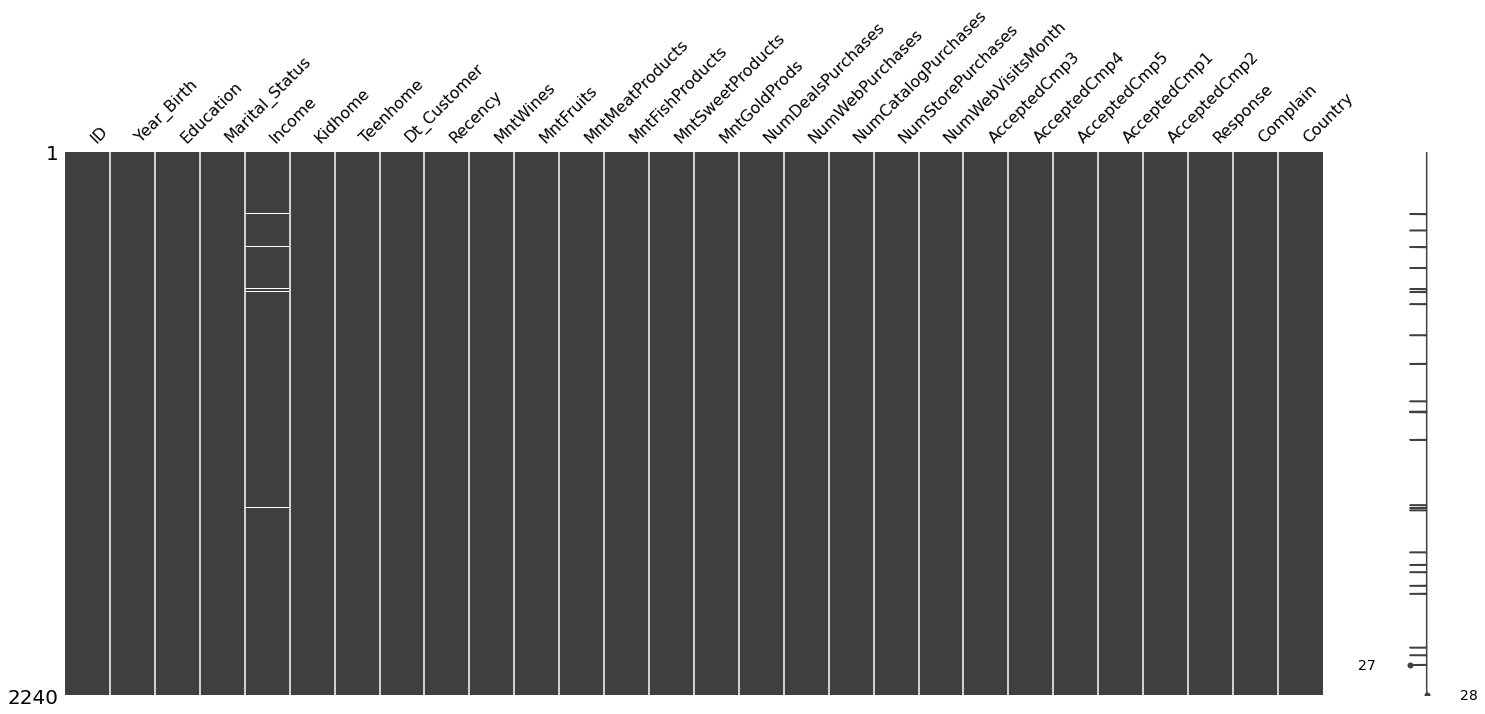

In [ ]:
#Visualizamos los datos nulos
msno.matrix(df_marketing);

In [ ]:
# Eliminamos las filas con Null

def RenderizarColumnasConValoresNulos():
    is_NaN = df_marketing.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = df_marketing[row_has_NaN]
    return rows_with_NaN

RenderizarColumnasConValoresNulos()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
257,1295,1963,Graduation,Married,NaN,0,1,8/11/2013,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,0,CA
324,1612,1981,PhD,Single,NaN,1,0,5/31/13,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,0,AUS
393,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
478,2437,1989,Graduation,Married,NaN,0,0,6/3/2013,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,0,SP
566,2863,1970,Graduation,Single,NaN,1,2,8/23/13,67,738,20,172,52,50,20,6,2,3,10,7,0,1,0,1,0,0,0,SP
578,2902,1958,Graduation,Together,NaN,1,1,9/3/2012,87,19,4,12,2,2,6,1,1,0,3,5,0,0,0,0,0,0,0,AUS
628,3117,1955,Graduation,Single,NaN,0,1,10/18/13,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,0,AUS
756,3769,1972,PhD,Together,NaN,1,0,3/2/2014,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
873,4345,1964,2n Cycle,Single,NaN,1,1,1/12/2014,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1028,5079,1971,Graduation,Married,NaN,1,1,3/3/2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,0,AUS


In [ ]:
df_marketing.drop(RenderizarColumnasConValoresNulos().index, inplace=True)

In [ ]:
# Convertimos la variable Income en un float
df_marketing['Income'] = df_marketing['Income'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#Convertimos la variable Dt_Customer en tipo fecha
df_marketing['Dt_Customer']= pd.to_datetime(df_marketing['Dt_Customer'])


In [ ]:
#Visualizamos nuevamente los datos
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA
3,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA
4,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP


In [ ]:
#Vemos nuevamente un resumen de las variables
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

# Analisis de variable fecha

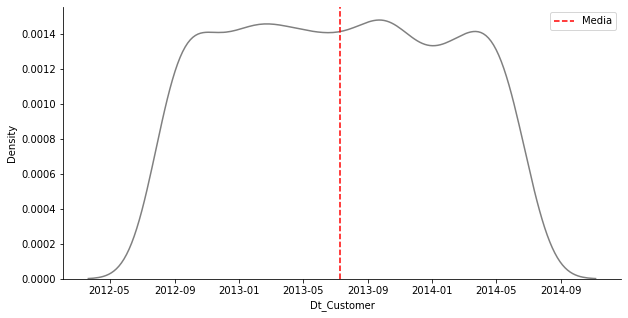

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(10, 5))
sbn.kdeplot(df_marketing['Dt_Customer'], ax=axes, color='gray')
axes.axvline(df_marketing['Dt_Customer'].mean(), color='red',
            linestyle='--', label='Media')
axes.legend()
sbn.despine()

En esta variable observamos que los clientes del Data Frame, se inscribieron en la empresa entre mayo de 2012 y septiembre de 2014. 

# Analisis de variables metricas

In [ ]:
#Guardo en un data frame las variables metricas para su analisis particular

column_names = ['Year_Birth', 'Income','Recency','MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','Dt_Customer' ]
df_numericas = df_marketing[column_names]
df_numericas.sample(N)


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Customer
1424,1981,58684.0,71,479,35,179,28,7,85,1,5,3,12,2,2014-06-16
2239,1986,41411.0,11,37,32,38,11,3,18,1,2,1,4,6,2013-12-07
1055,1995,34824.0,65,4,2,11,2,0,4,1,1,0,2,6,2014-03-26
1100,1976,9548.0,31,0,1,3,10,6,9,2,1,0,3,8,2012-08-08
1056,1955,74268.0,83,199,66,315,97,174,41,1,4,3,5,2,2013-02-14


In [ ]:
#Estadistica descriptiva de las variables numericas
df_numericas.describe ()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Se dejo afuera a la variable **ID**, ya que sólo identifica al cliente y no es relevante su análisis de estadistica descriptiva. 


In [ ]:
#Medidas de forma
medidas_form= pd.DataFrame()

medidas_form['Curtosis'] = df_numericas.kurtosis()
medidas_form['Asimetria'] = df_numericas.skew()
medidas_form

,Curtosis,Asimetria
Year_Birth,0.734670,-0.353661
Income,159.636700,6.763487
Recency,-1.199777,0.001648
MntWines,0.582741,1.170720
MntFruits,4.054082,2.101658
MntMeatProducts,5.055477,2.025577
MntFishProducts,3.076476,1.916369
MntSweetProducts,4.106141,2.103328
MntGoldProds,3.156342,1.839231
NumDealsPurchases,8.974490,2.415272


### Year Birth



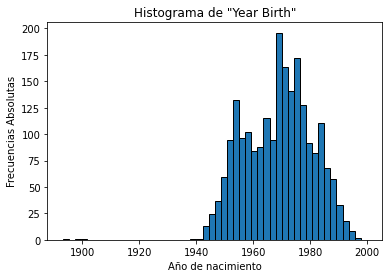

In [ ]:
#Histograma 
plt.hist(df_numericas.Year_Birth, bins=50, range=(1893,2000), edgecolor='black')
plt.xlabel("Año de nacimiento")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Year Birth"')
plt.show()

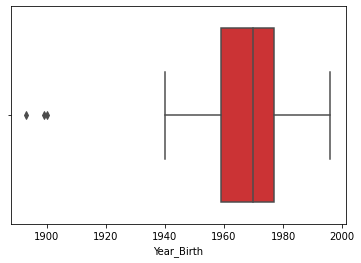

In [ ]:
#Box plot
sbn.boxplot(x="Year_Birth" , data=df_numericas, palette="Set1")


La mayor concentración de los años en fecha de nacimiento se visualiza entre 1950 y 1980. Determinando así un segmento de mercado pertenecientes a las generaciones Baby boomer, generación X en mayor medida. Y en su minoría, millenails.

In [ ]:
Year_Birth_outliers = df_numericas[df_numericas['Year_Birth'] <= 1920]

Year_Birth_outliers.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Customer
232,1899,83532.0,36,755,144,562,104,64,224,1,4,6,4,1,2013-09-26
1578,1900,36640.0,99,15,6,8,7,4,25,1,2,1,2,5,2013-09-26
2205,1893,60182.0,23,8,0,5,7,0,2,1,1,0,2,4,2014-05-17


En esta variable observamos tres valores outliers, tres clientes que nacieron antes de 1900 por lo que tendrán más de 110 años. 
Como vamos a utilizar esta variable para crear una nueva llamada 'Age', que representara la edad del cliente consideramos oportuno eliminar estos tres clientes. 

In [ ]:
#Eliminamos los tres clientes con edad outlier.
df_numericas = df_numericas[df_numericas['Year_Birth'] > 1900]

###Age

Nos parece oportuno crear una nueva variable **Age**, ya que consideramos que podremos obtener mayor información sobre el consumo de los clinetes a través de la edad que del año de nacimiento. La variable la creamos utilizando dos ya existentes en el DataFrame, la primera es **Dt_Customer** que nos indica el dia de suscripción del cliente a la empresa y la segunda sera **Year_Birth**. 
Decicimos realizarlo como la diferencia entre estas dos fechas, a sabiendas de que se generara con un sesgo debido a que la fecha de suscripción de los clientes data desde 2012 a 2014. Pero, como no sabemos la fecha en la que se tomaron estos datos, consideramos que el sesgo sera menor con la fecha de suscripción que con la fecha actual. 

In [ ]:
#Creamos la variable edad
def calculate_age(row):
    dt_customer = pd.to_datetime(row['Dt_Customer'])
    return dt_customer.year - row['Year_Birth']

df_numericas['Age'] = df_numericas.apply(lambda row: calculate_age(row), axis=1)

In [ ]:
#Visualizamos los datos nuevamente 
df_numericas.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Customer,Age
0,1985,70951.0,66,239,10,554,254,87,54,1,3,4,9,1,2013-05-04,28
1,1961,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,2014-06-15,53
2,1975,46098.0,86,57,0,27,0,0,36,4,3,2,2,8,2012-08-18,37
3,1947,25358.0,57,19,0,5,0,0,8,2,1,0,3,6,2013-07-22,66
4,1971,60491.0,81,637,47,237,12,19,76,4,6,11,7,5,2013-09-06,42


In [ ]:
df_numericas.describe ()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,1968.917307,52236.581563,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,2.325350,4.087664,2.671487,5.805242,5.321735,44.110709
std,11.700216,25178.603047,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,1.924402,2.741664,2.927096,3.250752,2.425092,11.736750
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,1959.000000,35246.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,36.000000
50%,1970.000000,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,43.000000
75%,1977.000000,68487.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,54.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,73.000000


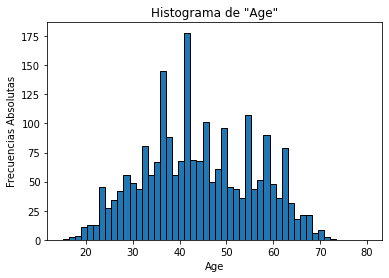

In [ ]:
#Histograma
plt.hist(df_numericas.Age, bins=50, range=(15,80), edgecolor='black') 
plt.xlabel("Age")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Age"')
plt.show()

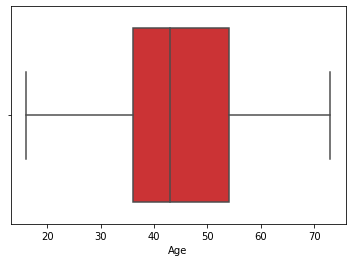

In [ ]:
#BoxPlot
sbn.boxplot(x="Age" , data=df_numericas, palette="Set1")

Los clientes tienen una edad promedio de 44 años, se distribuyen bastante uniformes en las edades teniendo algunos picos por ejemplo en 35 y 42 años. 
En el box plot observamos que el 50% central de los datos se encuentra entre los 35 y 55 años. 
La generación Baby boomer, comprendida entre los 50 y 75 años, aproximadamente presenta en forma general, un comportamiento de compra estable. Siendo este un segmneto de fácil fidelización. Priorizando los medios tradicionales de comercialización y publicidad. Se encuentran en un estadío post familiar, lo que implica cambios en sus patrones de consumo, tanto en cantidad como en tipologias de productos
En lo que respecta a un promedio de entre 35 a 44 años, podemos determinar un segmento generacional comprendido por millenials y generación X. Según diversos autores las edades que determina un rango generacional u otro puede variar. Lo importante a destacar son sus patrones de comportamiento en el marco de los datos analizados y su vinculación con la segmentación psicográfica, como herramienta del marketing. Si bien en ambos casos, ambos grupos son adeptos a la tecnología, los millenials incorporaron a muy temprana edad los canales digitales para compra y exploración de marcas. La generación X, por el contrario, vivieron el quiebre con el advenimiento de internet y los cambios en el modo y forma de consumo. 


###Income

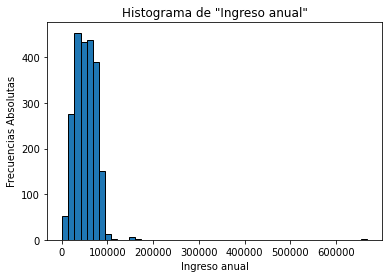

In [ ]:
#Histograma
plt.hist(df_numericas.Income, bins=50, range=(1700,666666), edgecolor='black') 
plt.xlabel("Ingreso anual")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Ingreso anual"')
plt.show()

El ingreso anual muestra una acumulación entre los 35.000 a los 85/90.000 Euros anuales. Lo que determina un nivel socio económico perteneciente a una clase media y clase media alta. 

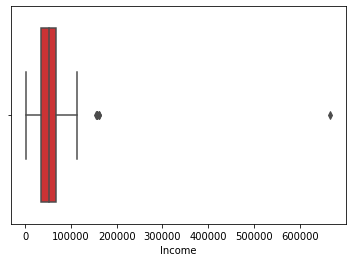

In [ ]:
#BoxPlot
sbn.boxplot(x="Income" , data=df_numericas, palette="Set1")

In [ ]:
#Identificamos los Income outliers
df_numericas[df_numericas['Income'] > 600000]


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Customer,Age
1862,1977,666666.0,23,9,14,18,8,1,12,4,3,1,3,6,2013-06-02,36


Esta variable a priori es candidata a ser elegida para la modelización, ya que es uno de los factores mas importantes que influyen en las decisiones de consumo de los clientes. 
El ingreso minimo es de 1730 Euros al año. El 50% central de los datos (lo que esta en la caja) se concentra en 30 y 70 mil euros anuales. 
El maximo es 666666, este es un valor que nos llama la atención y creemos que es un dato sucio, por lo que lo removeremos del dataset.

In [ ]:
#Excluimos los outliers para visualizar la distribucion de los otros datos
Income_sin_outliers=df_numericas[df_numericas['Income'] <= 600000]

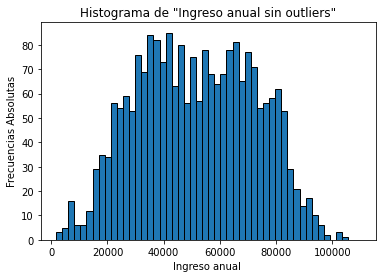

In [ ]:
#Histograma sin outliers
plt.hist(Income_sin_outliers.Income, bins=50, range=(1700,110000), edgecolor='black') 
plt.xlabel("Ingreso anual ")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Ingreso anual sin outliers"')
plt.show()

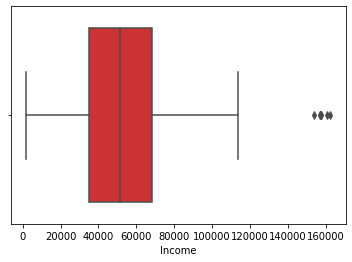

In [ ]:
#BoxPlot sin outliers
sbn.boxplot(x="Income" , data=Income_sin_outliers, palette="Set1")

In [ ]:
# Medidas de forma
print('Curtosis:', stats.kurtosis(Income_sin_outliers['Income'].values))
print('Asimetría:', stats.skew(Income_sin_outliers['Income'].values))

Curtosis: 0.7121010093985811
Asimetría: 0.3477919335295039


Se observa como explicamos anteriormente que el 50 % central de los datos se encuentran en ingresos de entre 30 y 70 mil euros anuales. Ademas, solo 5 clientes tienen un ingreso mayor a 120000. 
El box plot indica la mediana de Euros 50.000 anulaes

In [ ]:
#Eliminamos el valor maximo para Income
df_numericas = df_numericas[df_numericas['Income'] < 666666]

###Recency

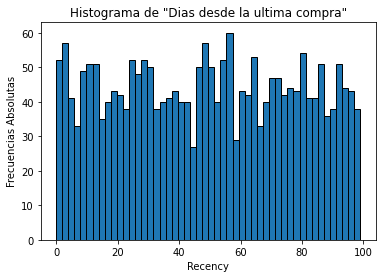

In [ ]:
#Histograma
plt.hist(df_numericas.Recency, bins=50, edgecolor='black') 
plt.xlabel("Recency")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Dias desde la ultima compra"')
plt.show()

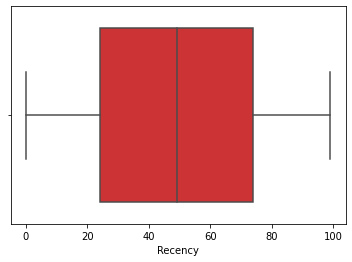

In [ ]:
#BoxPlot
sbn.boxplot(x="Recency" , data=df_numericas, palette="Set1")

El mínimo de frecuencia de compras se observa en los 25 días (cada 25 días se realiza una compra). En el pico máximo, cada 60 días se realiza una compra, desde la úlima. En su mayoría, se observan variaciones entre los 30 y 50 días, entre adquisiciones. 

###Gasto en clases de productos

Text(0.5, 0.98, 'Gasto total en los ultimos 2 años por tipo de producto')

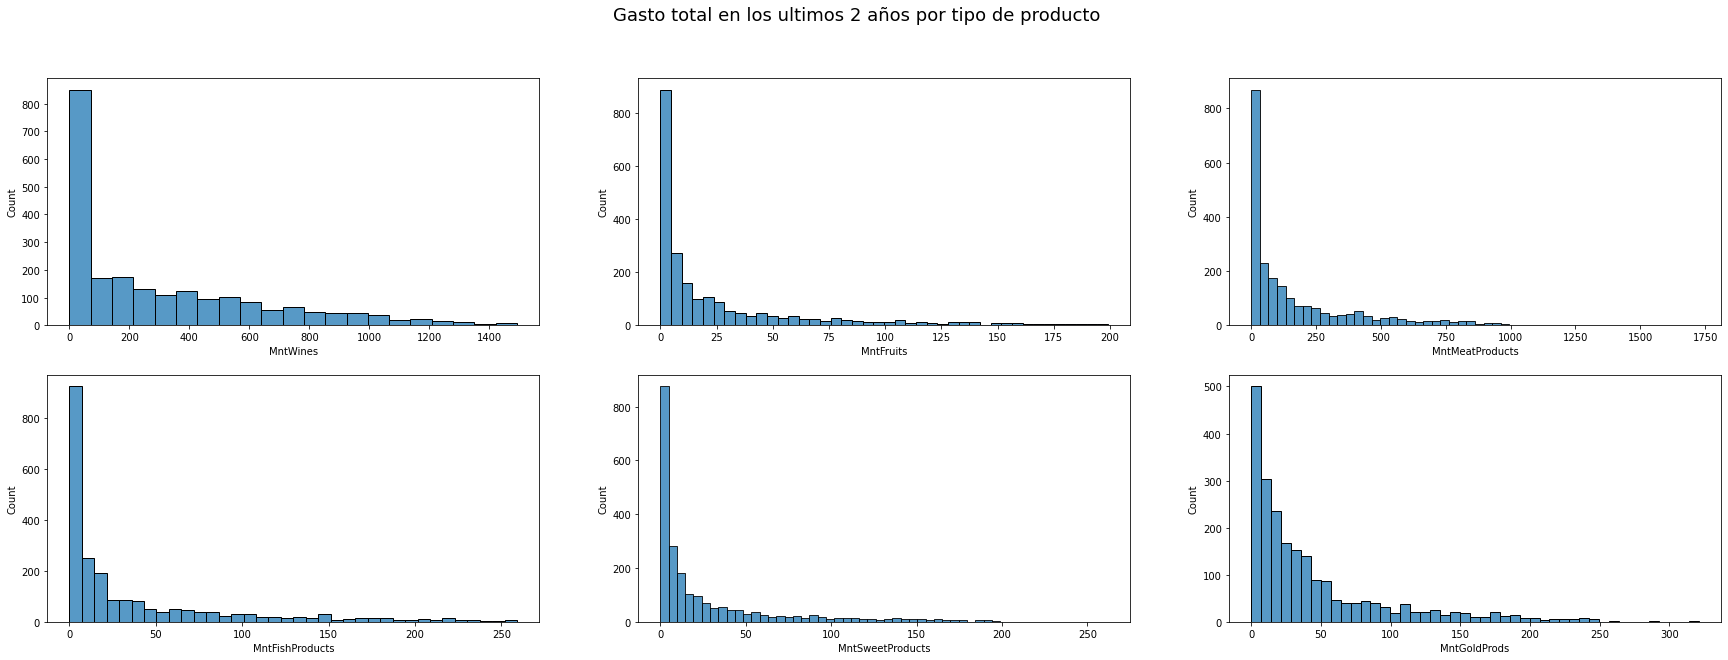

In [ ]:
#Histogramas
fig, axs = plt.subplots(2, 3, figsize=(30, 10))
sbn.histplot(data= df_numericas,x='MntWines', ax=axs[0,0])
sbn.histplot(data=df_numericas,x='MntFruits', ax=axs[0,1])
sbn.histplot(data=df_numericas,x='MntMeatProducts', ax=axs[0,2])
sbn.histplot(data=df_numericas,x='MntFishProducts', ax=axs[1,0])
sbn.histplot(data=df_numericas,x='MntSweetProducts', ax=axs[1,1])
sbn.histplot(data=df_numericas,x='MntGoldProds', ax=axs[1,2])
fig.suptitle('Gasto total en los ultimos 2 años por tipo de producto', fontsize=18)

Text(0.5, 0.98, 'Gasto total en los ultimos 2 años por tipo de producto')

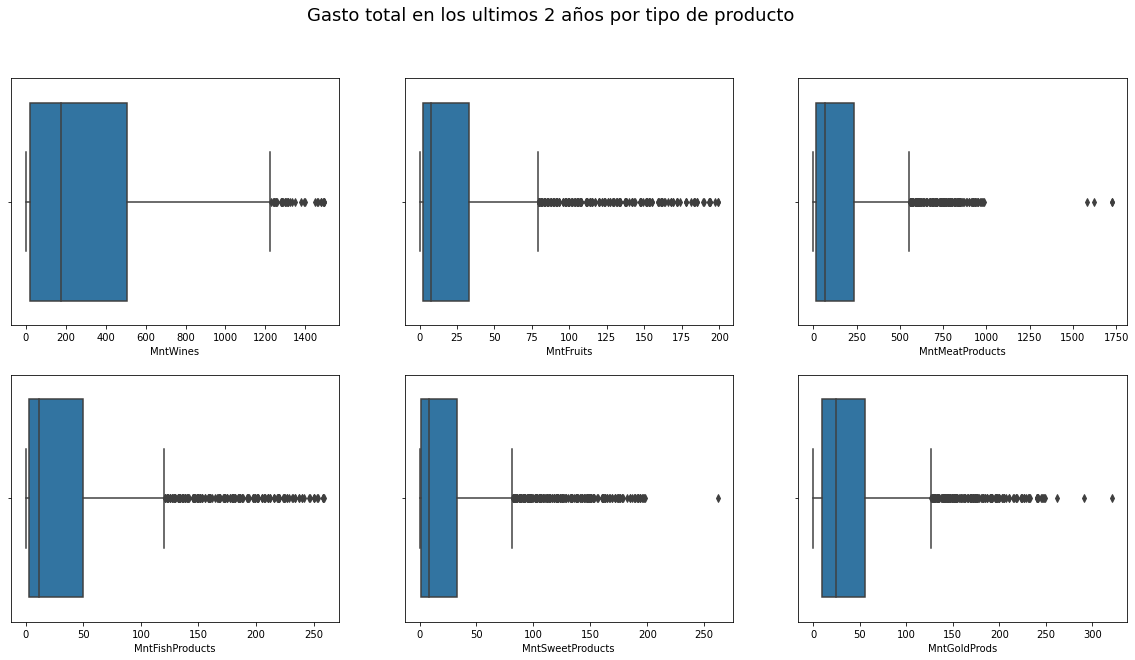

In [ ]:
#BoxPlot
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sbn.boxplot(data= df_numericas ,x='MntWines', ax=axs[0,0])
sbn.boxplot(data=df_numericas ,x='MntFruits', ax=axs[0,1])
sbn.boxplot(data=df_numericas ,x='MntMeatProducts', ax=axs[0,2])
sbn.boxplot(data=df_numericas ,x='MntFishProducts', ax=axs[1,0])
sbn.boxplot(data=df_numericas ,x='MntSweetProducts', ax=axs[1,1])
sbn.boxplot(data=df_numericas ,x='MntGoldProds', ax=axs[1,2])
fig.suptitle('Gasto total en los ultimos 2 años por tipo de producto', fontsize=18)

En el gasto de todos los productos se observa una marcada asimetría derecha (la media es superior a la mediana), es decir muchos clientes que gastaron poco y pocos que gastaron mucho en cada categoría de productos. Esta medida de forma la podemos observar tanto en los gráficos como en las medidas de forma numéricas, anteriormente planteadas. Ademas, en todos los productos encontramos muchos valores outliers pero que gráficamente se ven como puntos cercanos unos de otros, excepto en  **MntMeatProducts**, **MntSweetProducts** y **MntGoldProds** que tienen algunos puntos mas alejados.

En el caso del la variable **MntWines** se observa una mayor dispersión, una caja mas ancha y un brazo derecho mas largo.  

En este caso, nos parece importante dejar todos estos valores outliers, ya que son muchos y es otra variable que a priori consideramos importante para el análisis.


###Gasto total

In [ ]:
#Creamos la variable gasto total
df_numericas["Gasto_Total"] = df_numericas["MntWines"] + df_numericas["MntFruits"] +\
df_numericas["MntMeatProducts"] + df_numericas["MntFishProducts"] + df_numericas["MntSweetProducts"] +\
df_numericas["MntGoldProds"]


df_numericas.sample(N)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Customer,Age,Gasto_Total
1216,1975,57338.0,96,143,6,52,11,8,17,2,4,1,5,5,2014-04-29,39,237
87,1956,35340.0,1,27,0,12,0,1,5,2,2,0,3,5,2014-06-29,58,45
934,1954,74637.0,73,960,64,464,146,0,16,1,6,9,9,3,2013-05-18,59,1650
1501,1978,41580.0,15,56,5,24,4,0,3,3,2,1,3,5,2012-12-10,34,92
1669,1968,55954.0,63,447,0,28,0,0,43,3,8,2,6,7,2014-03-03,46,518


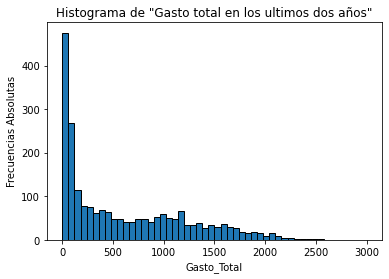

In [ ]:
#Histograma
plt.hist(df_numericas.Gasto_Total, bins=50, range=(0,3000), edgecolor='black') 
plt.xlabel("Gasto_Total")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Gasto total en los ultimos dos años"')
plt.show()

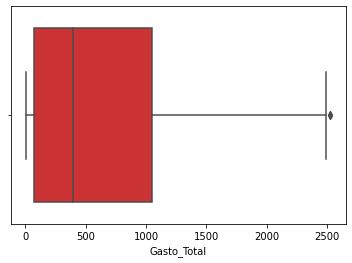

In [ ]:
#BoxPlot
sbn.boxplot(x="Gasto_Total" , data=df_numericas, palette="Set1")

Creamos una variable **Gasto_Total** con la suma de lo gastado en cada tipo de porducto en los ultimos 2 años. En la misma, se denota una asimetría derecha heredada de los gastos individuales, pero en este caso solo obtenemos un valor outlier que no se encuentra muy alejado del límite superior.
La media de gasto total es de 602, mientras que la mediana es de 397 euros, lo cual se debe a la asimetría derecha. 

###Medios de compra

Text(0.5, 0.98, 'Numero de compras por medio de compra')

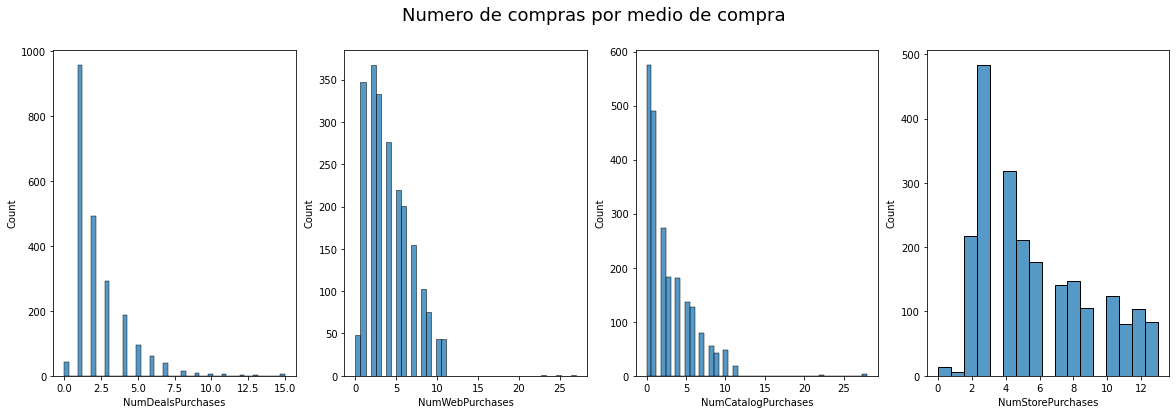

In [ ]:
#Histogramas
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
sbn.histplot(data= df_numericas,x='NumDealsPurchases', ax=axs[0])
sbn.histplot(data=df_numericas,x='NumWebPurchases', ax=axs[1])
sbn.histplot(data=df_numericas,x='NumCatalogPurchases', ax=axs[2])
sbn.histplot(data=df_numericas,x='NumStorePurchases', ax=axs[3])

fig.suptitle('Numero de compras por medio de compra', fontsize=18)

Text(0.5, 0.98, 'Numero de compras por medio de compra')

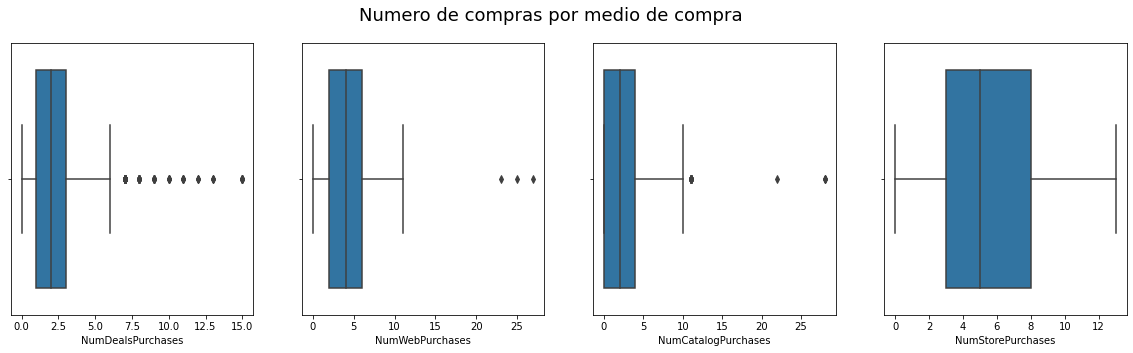

In [ ]:
#BoxPlot
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
sbn.boxplot(data= df_numericas ,x='NumDealsPurchases', ax=axs[0])
sbn.boxplot(data=df_numericas ,x='NumWebPurchases', ax=axs[1])
sbn.boxplot(data=df_numericas ,x='NumCatalogPurchases', ax=axs[2])
sbn.boxplot(data=df_numericas ,x='NumStorePurchases', ax=axs[3])

fig.suptitle('Numero de compras por medio de compra', fontsize=18)

In [ ]:
print('Cant. total de compras Deals', sum(df_numericas.NumDealsPurchases))
print('Cant. total de compras Web', sum(df_numericas.NumWebPurchases))
print('Cant. total de compras Catalog', sum(df_numericas.NumCatalogPurchases))
print('Cant. total de compras Store', sum(df_numericas.NumStorePurchases))

Cant. total de compras Deals 5142
Cant. total de compras Web 9043
Cant. total de compras Catalog 5911
Cant. total de compras Store 12844


Para estas variables podemos observar que según la plaza de venta física y virtual se produjeron mayores compras en el **store**, las compras por la **web** se encuentra en segundo lugar. Luego, la venta por **catálogo** ocupa tercer lugar como canal de venta. Otro aspecto a considerar es que cerca de 1000 personas compraron en alguna oportunidad con **descuentos**.
Para los medios de comprar por descuentos, por la web y por catálogo se denota una asimetría derecha. Además, los clientes que más cantidad de veces compraron fueron 28 y en todas las categorías el mínimo es cero, es decir hay clientes que no compraron por ese medio.

### Compras totales

In [ ]:
#Creamos la variable compras totales
df_numericas["Compras_Totales"] = df_numericas["NumDealsPurchases"] + df_numericas["NumWebPurchases"] +\
df_numericas["NumCatalogPurchases"] + df_numericas["NumStorePurchases"] 

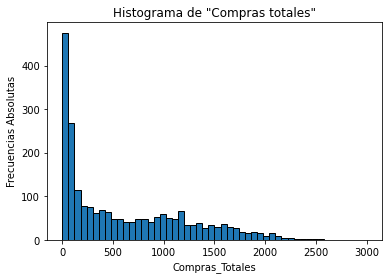

In [ ]:
#Histograma
plt.hist(df_numericas.Gasto_Total, bins=50, range=(0,3000), edgecolor='black') 
plt.xlabel("Compras_Totales")
plt.ylabel("Frecuencias Absolutas")
plt.title('Histograma de "Compras totales"')
plt.show()

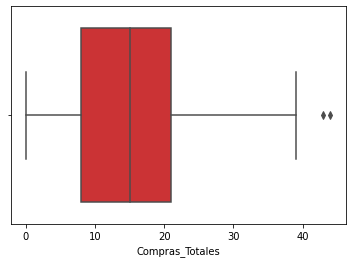

In [ ]:
#BoxPlot
sbn.boxplot(x="Compras_Totales" , data=df_numericas, palette="Set1")

Decidimos realizar una variable que sintetice la cantidad de compras en la empresa, sin distinguir el medio por el cual lo hizo. Observamos para esta variable el 50% central de los clienes compro entre 14 y 21 compras. El cliente con mayor cantidad de compras es 44, 16 compras más que el máximo de las categorías individuales.

### Número de visitas web

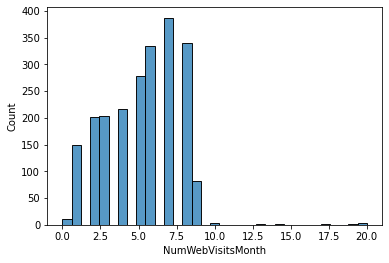

In [ ]:
#Histograma
sbn.histplot(data=df_numericas,x='NumWebVisitsMonth')

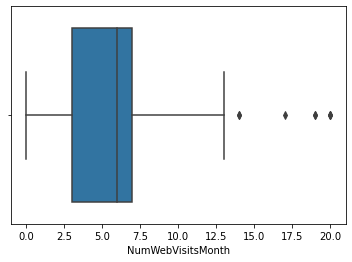

In [ ]:
#BoxPlot
sbn.boxplot(data=df_numericas ,x='NumWebVisitsMonth')

En esta variable no sabemos si el cliente ingreso y compro, observamos que la mayor frecuencia se da en 7 visitas en el mes y algunos valores outliers ceranos a 20 visitas. 

### Cierre

Pasamos las nuevas variables y eliminamos los outliers del DataFrame: df_marketing

In [ ]:
#Eliminamos los tres clientes con edad outlier.
df_marketing = df_marketing[df_marketing['Year_Birth'] > 1900]

#Creamos la variable Age
df_marketing['Age'] = df_marketing.apply(lambda row: calculate_age(row), axis=1)

#Eliminamos el valor maximo para Income
df_marketing = df_marketing[df_marketing['Income'] < 666666]

#Creamos la variable Gasto_Total
df_marketing["Gasto_Total"] = df_marketing["MntWines"] + df_marketing["MntFruits"] +\
df_marketing["MntMeatProducts"] + df_marketing["MntFishProducts"] + df_marketing["MntSweetProducts"] +\
df_marketing["MntGoldProds"]

#Creamos la variable Compras totales
df_marketing["Compras_Totales"] = df_marketing["NumDealsPurchases"] + df_marketing["NumWebPurchases"] +\
df_marketing["NumCatalogPurchases"] + df_marketing["NumStorePurchases"] 


df_marketing.sample(N)
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

In [ ]:
df_numericas.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Gasto_Total,Compras_Totales
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.913653,51958.810579,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,44.114376,607.268083,14.891501
std,11.701599,21527.278844,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,11.738136,602.513364,7.671629
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000,0.000000
25%,1959.000000,35233.500000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,36.000000,69.000000,8.000000
50%,1970.000000,51371.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,43.000000,397.000000,15.000000
75%,1977.000000,68487.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,54.000000,1048.000000,21.000000
max,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,73.000000,2525.000000,44.000000


# Analisis de variables categoricas

In [ ]:
#Guardamos en un data frame las variables categoricas para su analisis
column_names = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Country' ]
df_categ = df_marketing[column_names]
df_categ.sample(N)

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Country
1924,Graduation,Married,0,1,0,0,0,0,1,0,0,CA
1053,PhD,Divorced,0,1,0,0,0,0,0,0,0,SP
753,PhD,Single,0,0,1,0,0,0,0,1,0,SA
1914,PhD,Married,0,1,0,1,0,1,0,0,0,SP
1301,Graduation,Married,1,1,0,0,0,0,0,0,0,SP


### Educación


Valores distintos:  5


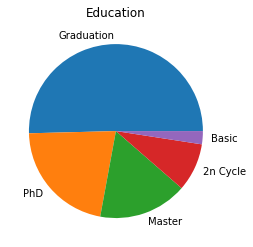

50.41 % Graduation   Num clientes: 1115
21.70 % PhD   Num clientes: 480
16.50 % Master   Num clientes: 365
8.95 % 2n Cycle   Num clientes: 198
2.44 % Basic   Num clientes: 54


In [ ]:
#Graficamos la variable Education
education = df_categ['Education']

val_counts = education.value_counts()

val_dist = len(val_counts)
val_tot = len(education)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Education')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts[j]/val_tot:.2f} % {val_counts.index[j]}   Num clientes: {val_counts[j]}")


Observamos que el nivel de educación de los clientes es elevado, solo un 8,95% posee una formación intermedia y 2,44% uno básico. Quizás tenga que ver con los países de los que se tomaron los datos.


Crearemos la variable **edu_cat**, con valores:

  * 0 : correspondiente a algún nivel de educación básica (primaria/secundaria)

  * 1 : correspondiente a un Master (1er nivel de educación avanzada)

  * 2: correspondiente a un Phd (2do nivel de educación avanzada)

Nos parece que condensar la información de **Education** en 3 categorias, podria sernos de utilidad para un mejor entrenamiento de los modelos, ya que estas 3 categorias se encuentran mas balanceadas.

In [ ]:
#Creamos la variable edu_cat
edu_cat = education.map({'Basic' : 0, '2n Cycle': 0, 'Graduation' : 0, 'Master' : 1, 'PhD': 2})

Valores distintos:  3


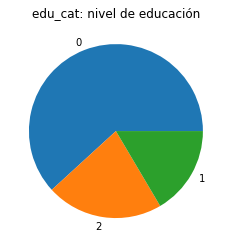

61.80 % nivel 0 Num clientes: 1367 
21.70 % nivel 2 Num clientes: 365 
16.50 % nivel 1 Num clientes: 480 


In [ ]:
#Graficamos la variable edu_cat

val_counts = edu_cat.value_counts()

val_dist = len(val_counts)
val_tot = len(edu_cat)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('edu_cat: nivel de educación')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts.iloc[j]/val_tot:.2f} % nivel {val_counts.index[j]} Num clientes: {val_counts[j]} ")

### Estado Marital

Valores distintos:  8


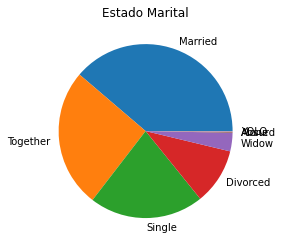

38.74 % Married  Num clientes: 857
25.81 % Together  Num clientes: 571
21.25 % Single  Num clientes: 470
10.44 % Divorced  Num clientes: 231
3.44 % Widow  Num clientes: 76
0.14 % Alone  Num clientes: 3
0.09 % Absurd  Num clientes: 2
0.09 % YOLO  Num clientes: 2


In [ ]:
# Estado marital

marital = df_categ['Marital_Status']

val_counts = marital.value_counts()

val_dist = len(val_counts)
val_tot = len(marital)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Estado Marital')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts[j]}")


Como se observa en el gráfico, existen 8 categorias distintas para esta variable. Pero, consideramos conveniente convertirla en una variable binaria: **en_pareja** indicando si el cliente está en pareja (*1*) o no (*0*). Esto nos será útil para luego calcular el número de integrantes de su familia.

Dentro de estas 8 categorias, hay dos: **YOLO** y **Absurd** en las que la no es del todo claro si el cliente está en pareja o no. Nos parece apropiado clasificarlas como **0** por el significado de esas expresiones. De todas maneras, dado que solo hay 4 clientes entre ambas categorias, creemos que no ponemos en riesgo la integridad del dataset al tomar esa decisión.


In [ ]:
#Creamos la variable binaria
en_pareja = marital.map({'Married' : 1, 'Together': 1, 'Single': 0, 'Divorced': 0, 'Alone': 0, 'Widow': 0, 'Absurd': 0, 'YOLO': 0 })


Valores distintos:  2


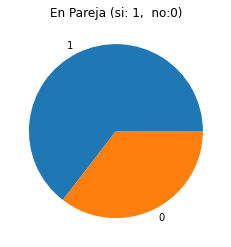

64.56 % 1   Num clientes: 784
35.44 % 0   Num clientes: 1428
Observamos que el {}


In [ ]:
#Graficamos la variable en_pareja

val_counts = en_pareja.value_counts()

val_dist = len(val_counts)
val_tot = len(en_pareja)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('En Pareja (si: 1,  no:0)')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts.iloc[j]/val_tot:.2f} % {val_counts.index[j]}   Num clientes: {val_counts[j]}")

print("Observamos que el {}")

Observamos que la mayoría de los clientes de la empresa esta en pareja.

###Kid Home

In [ ]:
kid_home = df_categ['Kidhome']

Valores distintos:  3


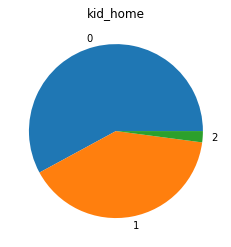

57.91 % 0  Num clientes: 1281
40.01 % 1  Num clientes: 885
2.08 % 2  Num clientes: 46


In [ ]:
val_counts = kid_home.value_counts()

val_dist = len(val_counts)
val_tot = len(kid_home)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('kid_home')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts[j]}")

### Teen Home

In [ ]:
teen_home = df_categ['Teenhome']


Valores distintos:  3


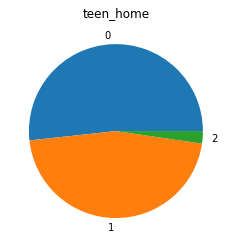

51.72 % 0  Num clientes: 1144
45.98 % 1  Num clientes: 1017
2.31 % 2  Num clientes: 51


In [ ]:
val_counts = teen_home.value_counts()

val_dist = len(val_counts)
val_tot = len(teen_home)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('teen_home')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts[j]}")

### Miembros de la familia

Las tres variables anteriores: **Marital_Status**, **Kid Home** y **TeenHome**, más uno por el cliente, las usamos para crear una nueva variable **fam_num** que representará el número de  integrantes de cada familia. Consideramos que esta nueva variable, aporta mayor información que cada una por separado.
Suponemos que no existen dos clientes de la misma familia.



In [ ]:
fam_num = en_pareja + 1
fam_num = fam_num + kid_home + teen_home

Valores distintos:  5


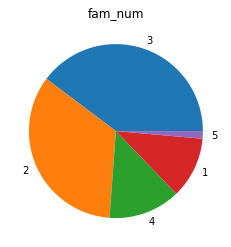

39.74 % 3  Num clientes: 879
34.09 % 2  Num clientes: 754
13.38 % 4  Num clientes: 296
11.39 % 1  Num clientes: 252
1.40 % 5  Num clientes: 31


In [ ]:
val_counts = fam_num.value_counts()

val_dist = len(val_counts)
val_tot = len(fam_num)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('fam_num')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts.iloc[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts.iloc[j]}")

La mayoria de los clientes viven con alguien, solo el 11,39% no.

Más del 70% poseen una familia pequeña de 2 ó 3 integrantes.

Aproximadamente 13% tienen una familia de 4 ó 5 integrantes.

### AcceptedCmp

Las variables AcceptedCmp1-5 nos dicen si el cliente aceptó esa campaña.
Primero graficamos cada variable para ver las proporciones de aceptación de campañas. Guardamos en la variable **acceptacion_por_camp** ese valor, para luego graficar el nivel de aceptación para cada campaña. 

In [ ]:
aceptacamp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df_acepta = df_categ[aceptacamp]




////////// 
 AcceptedCmp1 
////////// 

Valores distintos:  2


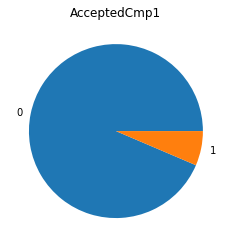

93.58 % 0  Num clientes: 2070
6.42 % 1  Num clientes: 142



////////// 
 AcceptedCmp2 
////////// 

Valores distintos:  2


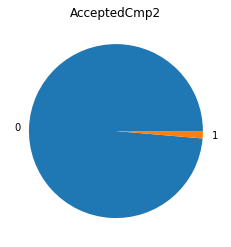

98.64 % 0  Num clientes: 2182
1.36 % 1  Num clientes: 30



////////// 
 AcceptedCmp3 
////////// 

Valores distintos:  2


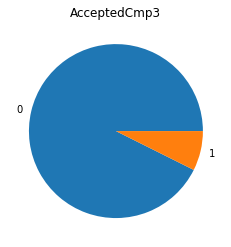

92.63 % 0  Num clientes: 2049
7.37 % 1  Num clientes: 163



////////// 
 AcceptedCmp4 
////////// 

Valores distintos:  2


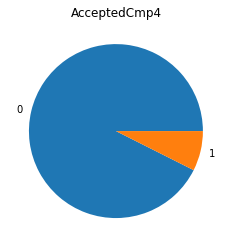

92.59 % 0  Num clientes: 2048
7.41 % 1  Num clientes: 164



////////// 
 AcceptedCmp5 
////////// 

Valores distintos:  2


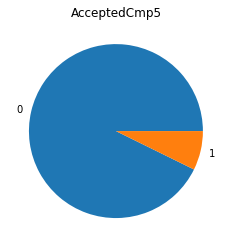

92.72 % 0  Num clientes: 2051
7.28 % 1  Num clientes: 161


In [ ]:
aceptacion_por_camp = []

for column in df_acepta.columns:
  print("\n\n\n////////// \n", column, "\n////////// \n")
  esta_columna = df_acepta[column]
  val_counts = esta_columna.value_counts()
  val_dist = len(val_counts)
  val_tot = len(esta_columna)

  print('Valores distintos: ',val_dist)

  plt.pie(val_counts, labels = val_counts.index)
  plt.title(column)
  plt.show()

  for j in range(val_dist):
    print(f"{100*val_counts[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts.iloc[j]}")
  proporcion_si = val_counts[1]/val_tot
  aceptacion_por_camp.append(proporcion_si)

Text(0.5, 0, 'Numero de Campaña')

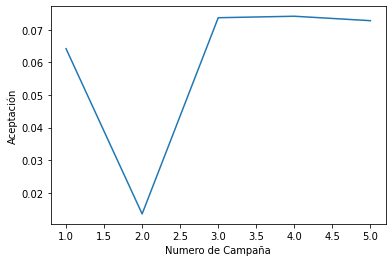

In [ ]:
### Porcentaje de aceptación de campañas
plt.plot([1,2,3,4,5], [x for x in aceptacion_por_camp])
plt.ylabel('Aceptación')
plt.xlabel('Numero de Campaña')


Vemos que la campaña de menor aceptación fue la segunda (con bastante diferencia), mientras que las 3, 4 y 5 son las que mayor aceptación tuvieron.

In [ ]:
# Creamos la variable sum_acepta
sum_acepta = df_acepta.sum(axis = 1)
df_acepta = df_acepta.assign(sum_acepta=sum_acepta.values)


0    1754
1     322
2      81
3      44
4      11
Name: sum_acepta, dtype: int64
Valores distintos:  5


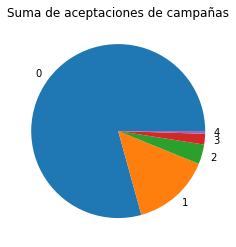

79.29 % 0  Num clientes: 1754
14.56 % 1  Num clientes: 322
3.66 % 2  Num clientes: 81
1.99 % 3  Num clientes: 44
0.50 % 4  Num clientes: 11


In [ ]:
esta_columna = df_acepta.sum_acepta
val_counts = esta_columna.value_counts()
val_dist = len(val_counts)
val_tot = len(esta_columna)
print(val_counts)
print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Suma de aceptaciones de campañas')
plt.show()

for j in range(val_dist):
  categ = val_counts.index[j]
  print(f"{100*val_counts[categ]/val_tot:.2f} % {categ}  Num clientes: {val_counts[categ]}")


Podemos ver ahora que una gran mayoria, casi el 80% de los clientes nunca aceptaron una campaña. Mientras que hay al rededor de 15% de clientes que aceptaron 1 campaña. Y solo 6% de los clientes aceptaron mas de 1 campaña.

### Response

Esta es una de las variables que tomaremos como variable objetivo al ajustar los datos con distintos modelos.

Nos resulta de interes por ser el dato más actualizado de aceptación de campañas, de poder generar buenas predicciones, se podría usar el modelo para predecir si un cliente (nuevo o que no esté en esta base de datos) aceptará una campaña o no. 

In [ ]:
response = df_categ['Response']


Valores distintos:  2


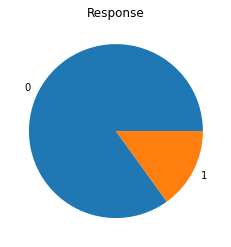

84.95 % 0  Num clientes: 1879
15.05 % 1  Num clientes: 333


In [ ]:
val_counts = response.value_counts()

val_dist = len(val_counts)
val_tot = len(response)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Response')
plt.show()


for j in range(val_dist):
  print(f"{100*val_counts[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts.iloc[j]}")
proporcion_si = val_counts[1]/val_tot
aceptacion_por_camp.append(proporcion_si)

Vemos que la proporción de aceptación mejoró sustancialmente desde la ultima campaña (7%). Sin embargo, debemos tener en cuenta que esta variable está muy desbalanceada.

### Complain

In [ ]:
complain = df_categ['Complain']


Valores distintos:  2


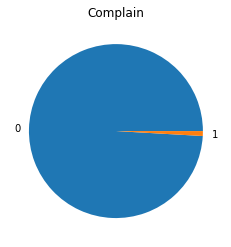

99.10 % 0  Num clientes: 2192
0.90 % 1  Num clientes: 20


In [ ]:
val_counts = complain.value_counts()

val_dist = len(val_counts)
val_tot = len(complain)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Complain')
plt.show()

for j in range(val_dist):
  print(f"{100*val_counts.iloc[j]/val_tot:.2f} % {val_counts.index[j]}  Num clientes: {val_counts.iloc[j]}")

Esta variable no será tomada en cuenta por que sólo toma valores distintos a 0 en el 1% de los clientes.

### Country

In [ ]:
#@title
# Country Name By ISO

ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Serbia and Montenegro',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

In [ ]:
country = df_categ['Country']
country.describe()

count     2212
unique       8
top         SP
freq      1092
Name: Country, dtype: object

Valores distintos:  8


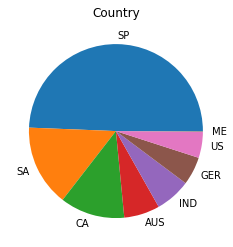

49.37 % SP  Num clientes: 1092
None
15.14 % SA  Num clientes: 335
Saudi Arabia
12.03 % CA  Num clientes: 266
Canada
6.65 % AUS  Num clientes: 147
None
6.60 % IND  Num clientes: 146
None
5.24 % GER  Num clientes: 116
None
4.84 % US  Num clientes: 107
United States of America
0.14 % ME  Num clientes: 3
None


In [ ]:
val_counts = country.value_counts()

val_dist = len(val_counts)
val_tot = len(country)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Country')
plt.show()

for j in range(val_dist):
  ind_pais = val_counts.index[j]
  print(f"{100*val_counts.iloc[j]/val_tot:.2f} % {ind_pais}  Num clientes: {val_counts.iloc[j]}")
  print(ISO3166.get(ind_pais))

La cantidad de clientes de 'SP' (España). Se podría pensar que la empresa está situada en españa.



In [ ]:
europeos = country.map({'SP' : 1, 'AUS': 1, 'GER': 1, 'US': 0, 'ME': 0, 'IND': 0, 'CA': 0, 'SA': 0 })


Valores distintos:  2


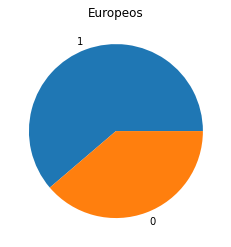

61.26 % 1  Num clientes: 1355
38.74 % 0  Num clientes: 857


In [ ]:
val_counts = europeos.value_counts()

val_dist = len(val_counts)
val_tot = len(europeos)

print('Valores distintos: ',val_dist)

plt.pie(val_counts, labels = val_counts.index)
plt.title('Europeos')
plt.show()

for j in range(val_dist):
  ind_pais = val_counts.index[j]
  print(f"{100*val_counts.iloc[j]/val_tot:.2f} % {ind_pais}  Num clientes: {val_counts.iloc[j]}")


### Cierre

Pasamos los cambios al Data Frame: df_marketing.

In [ ]:
df_marketing['edu_cat'] = edu_cat
df_marketing['en_pareja'] = en_pareja
df_marketing['fam_num'] = fam_num
df_marketing['sum_acepta'] = sum_acepta
df_marketing['Country']= country
df_marketing['Europeos']= europeos 
df_marketing.sample(N)
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

In [ ]:
df_marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Gasto_Total,Compras_Totales,edu_cat,en_pareja,fam_num,sum_acepta,Europeos
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.150542,0.009042,44.114376,607.268083,14.891501,0.599005,0.645570,2.593128,0.298373,0.612568
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.357683,0.094678,11.738136,602.513364,7.671629,0.821279,0.478449,0.906236,0.679570,0.487274
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,69.000000,8.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,397.000000,15.000000,0.000000,1.000000,3.000000,0.000000,1.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1048.000000,21.000000,1.000000,1.000000,3.000000,0.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,2525.000000,44.000000,2.000000,1.000000,5.000000,4.000000,1.000000


# Analisis conjunto



In [ ]:
df_marketing.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country', 'Age', 'Gasto_Total', 'Compras_Totales',
       'edu_cat', 'en_pareja', 'fam_num', 'sum_acepta', 'Europeos'],
      dtype=object)

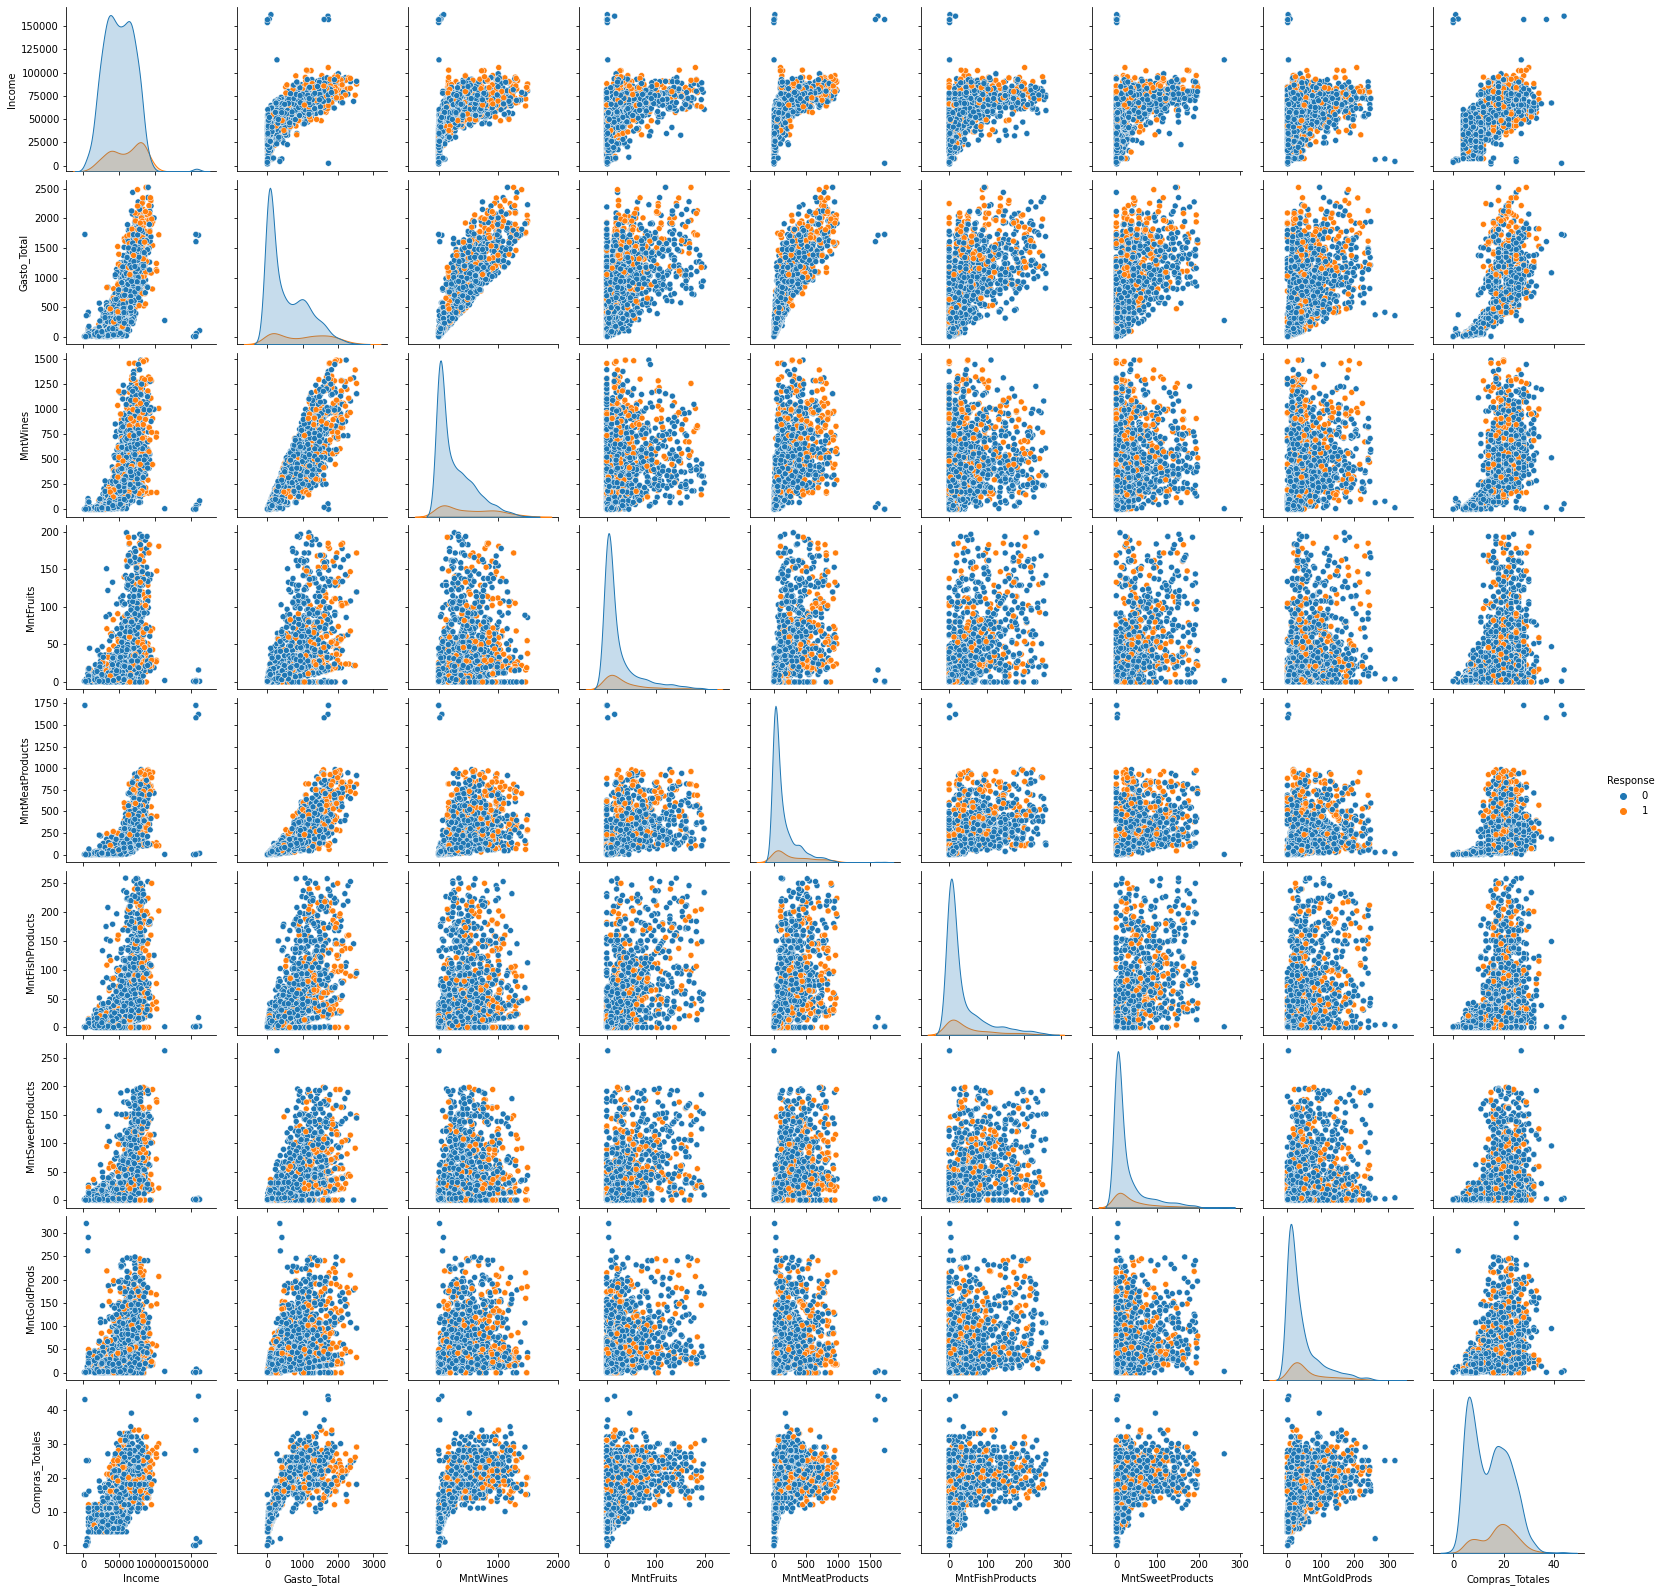

In [ ]:
#Graficamos las variables de monto para ver si hay graficamente una relacion
variables_graficos = ['Income',"Gasto_Total",'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Response', 'Compras_Totales']
df_marketing_1 = df_marketing[variables_graficos]
sbn.pairplot(df_marketing_1, hue="Response")


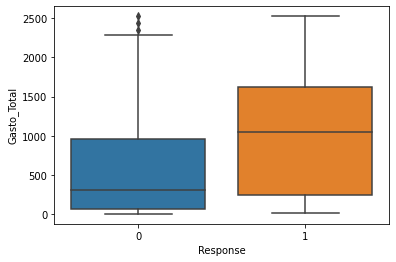

In [ ]:
# Box plot 

sbn.boxplot(x='Response', y='Gasto_Total', data=df_marketing)

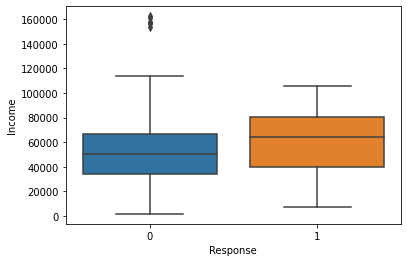

In [ ]:
# Box plot 

sbn.boxplot(x='Response', y='Income', data=df_marketing)


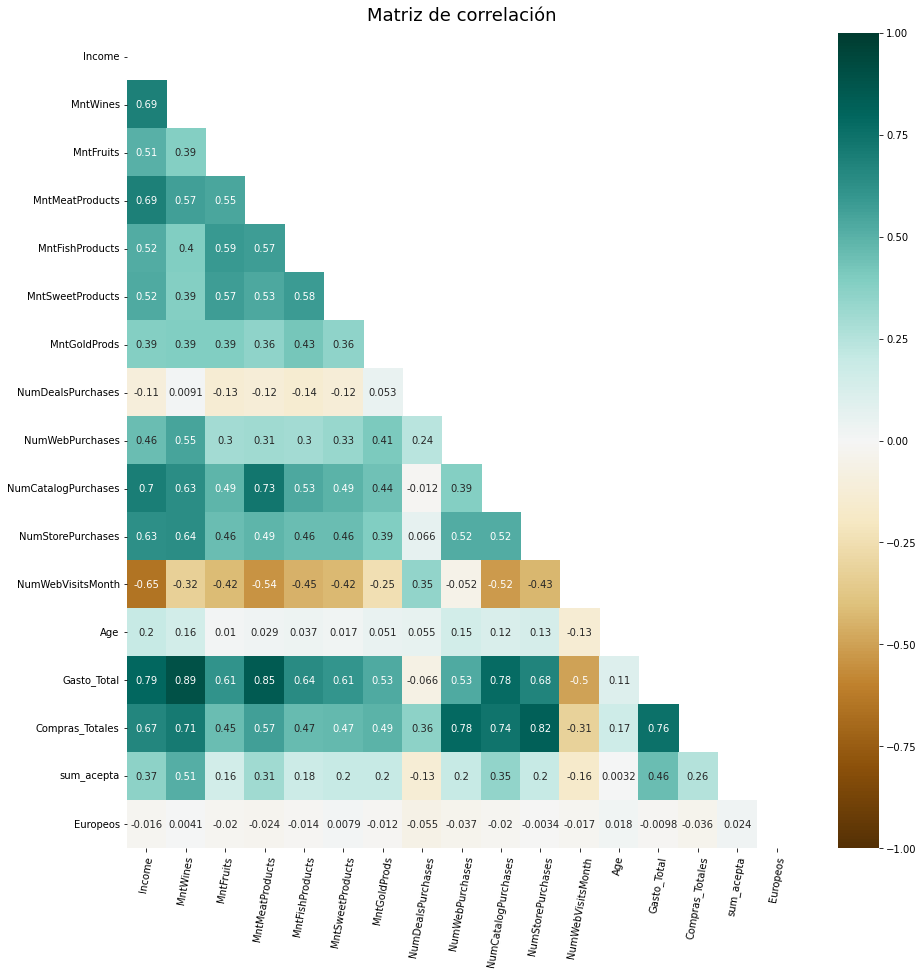

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))    
corr = df_marketing.drop(
    ['ID', "Year_Birth", "AcceptedCmp1", 
     "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
     "Kidhome", "Teenhome", "Complain", "Response","fam_num",
     "Recency","edu_cat","en_pareja"]
, axis=1).corr()     

mask = np.triu(np.ones_like(corr))
ax = sbn.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Matriz de correlación', fontdict={'fontsize':18}, pad=12);
ax.set_xticklabels(corr.columns, rotation=80)
plt.show()

# Modelos

##**Modelo Regresion Lineal simple**
Con la idea de cumplir el segundo objetivo planteado en el informe, inteantamos determinar si el ingreso (Income) es una variable que puede explicar el gasto total de los clientes. 
  
  * Variable Endógena (Y): Gasto_Total
  * Variable Hexógena (X): Income


Primero se crea el modelo con OLS , se grafica y luego se empieza a verificar los supuestos para saber si este modelo es bueno o no.

In [ ]:
#Definimos las variables
X_orig = df_marketing["Income"]
Y_orig = df_marketing["Gasto_Total"]

X , X_test, Y, Y_test = train_test_split(X_orig, Y_orig, test_size = 0.2)

print(X.shape)
print(X_test.shape)
print(Y.shape)
print(Y_test.shape)
#Ajustamso el modelo
model = sm.OLS(Y, sm.add_constant(X)) 
results = model.fit()             
results.summary()  


(1769,)
(443,)
(1769,)
(443,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gasto_Total   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2733.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:08   Log-Likelihood:                -13002.
No. Observations:                1769   AIC:                         2.601e+04
Df Residuals:                    1767   BIC:                         2.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -521.3329     23.333    -22.343      0.000    -567.097    -475.569
Income         0.0216      0.000     52.280      0.000       0.021       0.022
==============================================================================
Omnibus:                      330.300   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4722.727
Skew:                          -0.434   Prob(JB):                         0.00
Kurtosis:                      10.957   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De la salida podemos observar que:

  * Tanto el la **prueba F** de contarste global como en la **T** de contraste individual ( en este caso son equivalentes dado que es una regresión lineal simple), el modelo es aceptado con un nivel de significancia del 5% . Sin embargo observamos en la prueba T que el coeficiente de Income no es muy distinto de cero.

  * El **R2** nos indica que 62% la variabilidad observada en el gasto total está asociada en forma lineal con Income. 

  * Como se visualizó en graficos anteriores, la relación entre las dos variables es positiva y vemos que el coeficiente de la regresión nos afirma esto.

 

El R2 del modelo es: 0.6073550924237225
Visualizamos a los datos de entrenamiento junto con los de test y sus predicciones 


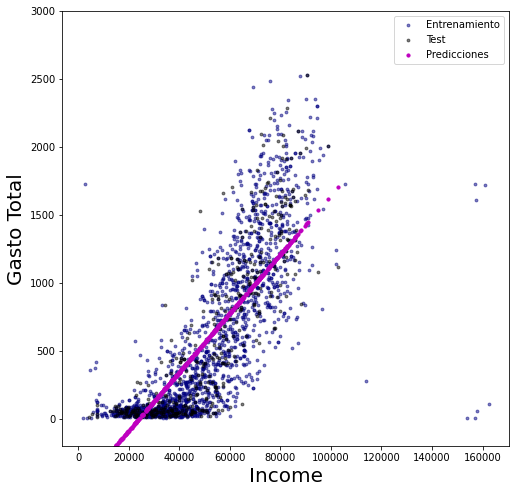

In [ ]:
print("El R2 del modelo es:", results.rsquared)   # muestra solo el R2
pendiente = results.params[1]
ord_o = results.params[0]
Valores_ajustados = X_test*pendiente + ord_o

print("Visualizamos a los datos de entrenamiento junto con los de test y sus predicciones ") 

fig, ax = plt.subplots(1, figsize = (8,8))     
ax = plt.scatter(X, Y, c = 'navy',s = 8, alpha = 0.5, label = 'Entrenamiento')
ax = plt.scatter(X_test, Y_test, c = 'k', s = 8, alpha = 0.5, label = 'Test')
ax = plt.scatter (X_test, Valores_ajustados, c = 'm', s = 10, label = 'Predicciones')
plt.xlabel('Income', fontsize=20)
plt.ylabel('Gasto Total', fontsize=20)
plt.ylim(-200, 3000)
plt.legend(loc = 'best')
plt.show()



### Evaluar Modelo: Supuesto de Homocedasticidad

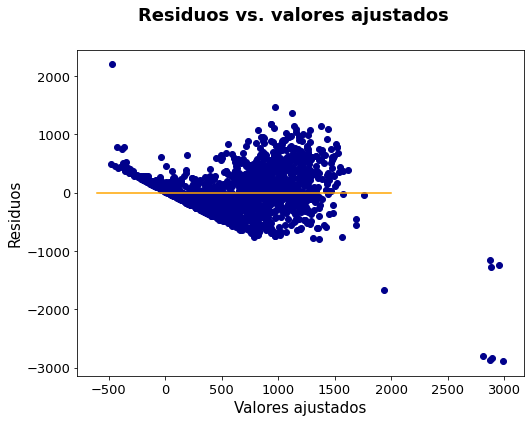

In [ ]:
Residuos = results.resid 
Valores_ajustados_train = results.predict()                  
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Residuos vs. valores ajustados", fontsize = 18, fontweight = "bold")
plt.scatter(Valores_ajustados_train, Residuos, color = "darkblue")
ax.set_xlabel("Valores ajustados", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 13)
plt.plot([-600, 2000], [0, 0], c="orange")
plt.show()

No hay heterocedasticidad porque los datos no se dispersan tanto mediante X aumenta su valor

In [ ]:
   
ResultadosTestRESET = reset_ramsey(results, degree=3)  

Estadístico = ResultadosTestRESET.statistic[0].item(0)         
pvalue = ResultadosTestRESET.pvalue.item(0)                   
Nombres = ["Estadístico", "p-value"]                           
pd.Series([Estadístico, round(pvalue, 5)], index = Nombres) 

Estadístico    362.170252
p-value          0.000000
dtype: float64

### Evaluar Modelo: Supuesto de Media cero

La violación de este supuesto conlleva que los estimadores del modelo pierdan su naturaleza insesgada, lo cual indica la importancia del mismo

In [ ]:
results.resid.mean()

1.496774941914001e-12

Es cercano a cero

### Evaluar Modelo: Normalidad

Usaremos el test de **Shapiro-Wilk**

Estadístico SW    9.276643e-01
p-value           2.123522e-28
dtype: float64


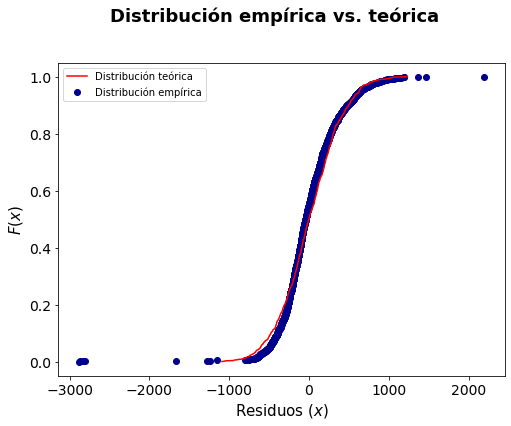

In [ ]:
from scipy import stats

ResultadosTestSW = stats.shapiro(results.resid) 
Nombres = ["Estadístico SW", "p-value"]
serie_sw = pd.Series(ResultadosTestSW, index = Nombres)

print(serie_sw)

# Primero armamos la función de distribución de nuestros residuos
x = np.sort(results.resid)              # ordenamos los residuos
n = x.size                         # tamaño total de la muestra
y = np.arange(1, n+1) / n          # calculamos las probabilidades acumuladas por cada valor observado en orden

# Luego obtenemos la función de distribución teórica de una normal
Residuos_teoricos = np.random.normal(loc = np.mean(results.resid),   # obtenemos una muestra aleatoria proveniente de una 
                    scale = np.std(results.resid), size = 1250)     # distribución normal con la media y desv.est. de nuestros residuos
x_teor = np.sort(Residuos_teoricos)       # ordenamos la muestra aleatoria
n_teor = x_teor.size                      # guardamos el tamaño de esta muestra
y_teor = np.arange(1, n_teor+1) / n_teor  # calculamos las probabilidades acumuladas por sus valores

# Por último, superponemos ambas distribuciones en un mismo gráfico
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Distribución empírica vs. teórica", fontsize = 18, fontweight = "bold")
ax.scatter(x, y, color = "darkblue", label = "Distribución empírica")
ax.plot(x_teor, y_teor, color = "red", label = "Distribución teórica")
ax.set_xlabel("Residuos ($x$)", fontsize = 15)
ax.set_ylabel("$F(x)$", fontsize = 15)
ax.tick_params(labelsize = 14)
ax.legend()
plt.subplots_adjust(top = 0.85)
plt.show()

No se rechaza la hipótesis nula de normalidad.

### Evaluar Modelo: Autocorrelacion

Otro supuesto importante para verificar es la ausencia de autocorrelación entre las perturbaciones. La autocorrelación, o correlación serial, es un problema mucho más frecuente en series de tiempo, pero si los datos son de corte transversal y fueron obtenidos en determinado orden, también podrían tenerlo presente. Usaremos el test de Durbin-Watson.

Si el estadístico de Durbin-Watson es sustancialmente menor que 2, hay evidencia de correlación serial positiva.

In [ ]:
test_dw = sms.durbin_watson(results.resid)
pd.Series(test_dw, index = ["Estadístico DW"])

Estadístico DW    2.0175
dtype: float64

El valor es de 1.94 significa que no hay problemas de autocorrelación.
Ahora usaremos el tests de Breusch-Godfrey

In [ ]:
ResultadosTestBG1 = sms.acorr_breusch_godfrey(results, nlags = 1)
pd.Series(ResultadosTestBG1, index = ["Estadístico LM", "p-value del estadístico LM", "Estadístico F", "p-value del estadístico F"])


Estadístico LM                0.136607
p-value del estadístico LM    0.711678
Estadístico F                 0.136386
p-value del estadístico F     0.711945
dtype: float64

No se rechaza la hipótesis nula de independencia serial (no autocorrelación) 

In [ ]:
print("Para finalizar, graficamos los datos de entrenamiento, de testeo y las predicciones del modelo")



Para finalizar, graficamos los datos de entrenamiento, de testeo y las predicciones del modelo


##**Modelo de regresión lineal múltiple**


In [ ]:
Y = df_marketing['Gasto_Total']
X = df_marketing[['edu_cat', 'Income',	'Recency',	'NumWebVisitsMonth',	'Age',	'Compras_Totales',	'en_pareja',	'fam_num',	'sum_acepta']]

### Supuestos de  Gauss-Markov y Multicolinealidad 

La multicolinealidad es la relación de dependencia lineal fuerte entre más de dos variables explicativas en una regresión múltiple que incumple el supuesto de Gauss-Markov cuando es exacta.

In [ ]:
X.corr()

,edu_cat,Income,Recency,NumWebVisitsMonth,Age,Compras_Totales,en_pareja,fam_num,sum_acepta
edu_cat,1.000000,0.110365,-0.019746,-0.022907,0.158785,0.066384,-0.006192,0.037133,0.026464
Income,0.110365,1.000000,0.007965,-0.650257,0.200908,0.670413,-0.004803,-0.286638,0.365986
Recency,-0.019746,0.007965,1.000000,-0.018965,0.014096,0.007658,-0.000417,0.014717,-0.013471
NumWebVisitsMonth,-0.022907,-0.650257,-0.018965,1.000000,-0.134712,-0.314777,0.003118,0.345316,-0.164944
Age,0.158785,0.200908,0.014096,-0.134712,1.000000,0.170407,0.004322,0.080186,0.003204
Compras_Totales,0.066384,0.670413,0.007658,-0.314777,0.170407,1.000000,0.004551,-0.204511,0.256498
en_pareja,-0.006192,-0.004803,-0.000417,0.003118,0.004322,0.004551,1.000000,0.563298,-0.000106
fam_num,0.037133,-0.286638,0.014717,0.345316,0.080186,-0.204511,0.563298,1.000000,-0.203037
sum_acepta,0.026464,0.365986,-0.013471,-0.164944,0.003204,0.256498,-0.000106,-0.203037,1.000000


A simple viste se puede ver que no hay multicolinealidad, pero la correlaciones mas fuerte son `Income` y `Compras_Totales`, y `Income` y `NumWebVisitsMonth`

###**Estimación**

Ahora podemos usar estos objetos como argumentos para estimar nuestro modelo por OLS utilizando la función `OLS()` de la librería `statsmodels`, pero esta función sólo permite especificar el modelo.

Para estimar los parámetros y mostrar los resultados es necesario recurrir a los métodos `fit()` y `summary()`

In [ ]:
MiModelo = sm.OLS(Y, sm.add_constant(X))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()               # Estimamos el modelo y guardamos los resultados
print(Resultados.summary())               # Mostramos los resultados

                            OLS Regression Results                            
Dep. Variable:            Gasto_Total   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     959.5
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:08   Log-Likelihood:                -15535.
No. Observations:                2212   AIC:                         3.109e+04
Df Residuals:                    2202   BIC:                         3.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -92.4188     41.42

- Como el `F-statistic` es bastante cercano a 1 y muchas variables tiene un `p-value` menor a 0.05 entonces se puede concluir que muchas variables tienen una gran cantidad de relacion lineal entre la variable endogena y las variables exogenas.

- `NumWebVisitsMonth` tiene un `p-value` de `0.961` y `edu_cat` de `0.988`, estas dos variables no las usaremos como variables exogenas a la hora de predecir `Income`. 

- El `R-squared` toma un valor de 0.797 el cual no es malo pero que intentaremos mejorar.





###**Diagnóstico: verificación de supuestos sobre la estructura del modelo**

###**Problemas de especificación**

Examinemos primero si la especificación es correcta mediante un gráfico de residuos vs. valores ajustados

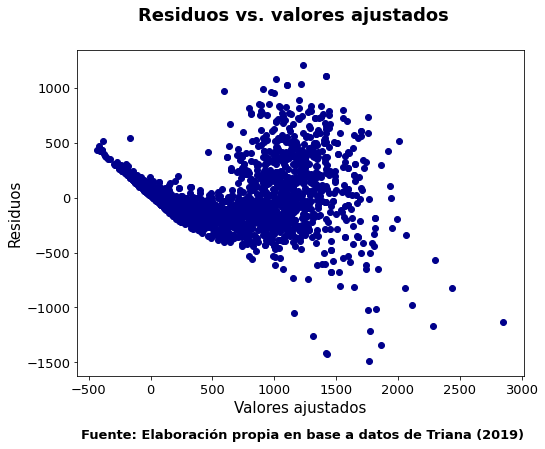

In [ ]:
Residuos = Resultados.resid                    # guardamos los residuos
Valores_ajustados = Resultados.predict()       # guardamos los valores ajustados
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Residuos vs. valores ajustados", fontsize = 18, fontweight = "bold")
ax.scatter(Valores_ajustados, Residuos, color = "darkblue")
ax.set_xlabel("Valores ajustados", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 13)
fig.text(.9,-.02, "Fuente: Elaboración propia en base a datos de Triana (2019)", fontsize = 13, fontweight = "bold", ha = "right")
plt.show()

No parece haber un patrón específico en los residuos y los valores parecen simétricamente distribuidos por encima y por debajo del cero.

Si queremos estar más seguros podemos realizar el **test RESET** de Ramsey. Se puede hacer con la función `reset_ramsey()` que viene en el módulo `stats.outliers_influence` de `Statsmodels`. 

In [ ]:
from statsmodels.stats.outliers_influence import reset_ramsey   # importamos la función
ResultadosTestRESET = reset_ramsey(Resultados, degree=3)
print(ResultadosTestRESET)

<F test: F=array([[234.93269409]]), p=3.362382655648004e-93, df_denom=2.2e+03, df_num=2>


In [ ]:
Estadístico = ResultadosTestRESET.statistic[0].item(0)         # extraemos y guardamos el estadístico F
pvalue = ResultadosTestRESET.pvalue.item(0)                    # extraemos y guardamos el p-value
Nombres = ["Estadístico", "p-value"]                           # asignamos nombres para armar la tabla de resultados
pd.Series([Estadístico, round(pvalue, 5)], index = Nombres)    # armamos una tabla con los resultados

Estadístico    234.932694
p-value          0.000000
dtype: float64

In [ ]:
ResultadosTestRainbow = sms.linear_rainbow(Resultados)
Nombres = ["Estadístico F", "p-value"]
pd.Series(ResultadosTestRainbow, index = Nombres)

Estadístico F    0.934682
p-value          0.868742
dtype: float64

###**Diagnóstico: variacion del R2 al quitar variables del modelo**



In [ ]:
Y_orig = df_marketing['Gasto_Total']
X_orig = df_marketing[['edu_cat', 'Income',	'Recency',	'NumWebVisitsMonth',	'Age',	'Compras_Totales',	'en_pareja',	'fam_num',	'sum_acepta']]

X, X_test, Y_train, Y_test = train_test_split(X_orig, Y_orig, test_size = 0.2)

In [ ]:
MiModelo = sm.OLS(Y_train, sm.add_constant(X))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()               # Estimamos el modelo y guardamos los resultados
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:            Gasto_Total   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     753.5
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:09   Log-Likelihood:                -12429.
No. Observations:                1769   AIC:                         2.488e+04
Df Residuals:                    1759   BIC:                         2.493e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -52.3006     46.34

In [ ]:
r2_orig = Resultados.rsquared
print("El R2 del modelo es:", r2_orig)   # muestra solo el R2

El R2 del modelo es: 0.7940488493385861


In [ ]:
X_new = X.drop('NumWebVisitsMonth', axis = 1)
MiModelo = sm.OLS(Y_train, sm.add_constant(X_new))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()  
print(Resultados.summary())
print("El R2 del modelo al quitar la variable NumWebVisitMonth es: ",Resultados.rsquared , "varía en:", round((Resultados.rsquared - r2_orig)/r2_orig, 5), "% respecto al valor anterior")

                            OLS Regression Results                            
Dep. Variable:            Gasto_Total   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     848.0
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:09   Log-Likelihood:                -12429.
No. Observations:                1769   AIC:                         2.488e+04
Df Residuals:                    1760   BIC:                         2.492e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -67.8430     36.795     

In [ ]:
X_new = X.drop(['NumWebVisitsMonth','edu_cat'], axis = 1)
MiModelo = sm.OLS(Y_train, sm.add_constant(X_new))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()  
print(Resultados.summary())
print("El R2 del modelo al quitar las  variable 'NumWebVisitsMonth','edu_cat' es: ",Resultados.rsquared , "varía en:", round((Resultados.rsquared - r2_orig)/r2_orig, 5), "% respecto al valor anterior")


                            OLS Regression Results                            
Dep. Variable:            Gasto_Total   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     969.2
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:09   Log-Likelihood:                -12429.
No. Observations:                1769   AIC:                         2.487e+04
Df Residuals:                    1761   BIC:                         2.492e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -66.7509     36.770     

In [ ]:
X_new = X.drop(['NumWebVisitsMonth','edu_cat', 'Recency', 'Age', 'en_pareja', 'fam_num','sum_acepta','Compras_Totales'], axis = 1)
MiModelo = sm.OLS(Y_train, sm.add_constant(X_new))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()  
print(Resultados.summary())
print("El R2 del modelo al usar solo 2 variables: Income y Compras_Totales es: ",Resultados.rsquared , "varía en:", round((Resultados.rsquared - r2_orig)/r2_orig, 5), "% respecto al valor anterior")


                            OLS Regression Results                            
Dep. Variable:            Gasto_Total   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2766.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:09   Log-Likelihood:                -12993.
No. Observations:                1769   AIC:                         2.599e+04
Df Residuals:                    1767   BIC:                         2.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -517.4395     23.060    -22.439      0.0

Por ultimo notamos que con tan solo 2 variables: *Income* y *Compras_Totales* se obtiene un R2 de 0.63

Podemos concluir que todas las variables usadas son relevantes en la precisión del ajuste de este modelo, salvo 'edu_cat' y 'NumWebVisitsMonth', que tienen p-values altos y practicamente no cambian el R2 al ser removidas del dataset.

### Predicciones
Creamos nuevos datasets de train y test que no contengan las columnas 'NumWebVisitsMonth' y 'edu_cat'.

In [ ]:
X_train = X.drop(['NumWebVisitsMonth','edu_cat'], axis = 1)
X_train = sm.add_constant(X_train, prepend=True)

print(X_train)


      const   Income  Recency  ...  en_pareja  fam_num  sum_acepta
1742    1.0  68657.0        4  ...          1        2           0
2189    1.0  66886.0       28  ...          1        3           0
1946    1.0   7500.0       24  ...          1        2           0
1629    1.0  31454.0       40  ...          1        4           0
139     1.0  42162.0       31  ...          1        3           1
...     ...      ...      ...  ...        ...      ...         ...
891     1.0  55801.0       35  ...          0        3           1
1390    1.0  68805.0       73  ...          0        2           0
1936    1.0  28587.0       42  ...          1        3           0
590     1.0  45906.0       20  ...          0        2           1
1574    1.0  54753.0       87  ...          1        3           0

[1769 rows x 8 columns]


In [ ]:
X_test = X_test.drop(['NumWebVisitsMonth','edu_cat'], axis = 1)
X_test = sm.add_constant(X_test, prepend=True)
print(X_test)

      const   Income  Recency  ...  en_pareja  fam_num  sum_acepta
1191    1.0  86857.0       96  ...          0        1           0
1019    1.0  42767.0       53  ...          0        3           0
1943    1.0  71391.0       50  ...          1        3           0
665     1.0  29760.0       87  ...          0        2           0
72      1.0  48070.0       33  ...          1        3           0
...     ...      ...      ...  ...        ...      ...         ...
680     1.0  76068.0       67  ...          1        3           2
1852    1.0  66373.0       57  ...          1        4           0
1016    1.0  42710.0       38  ...          0        2           0
315     1.0  82657.0       71  ...          1        2           2
1814    1.0  31880.0       13  ...          0        2           0

[443 rows x 8 columns]


In [ ]:
print(X_test.columns)
print(X_test.shape)
print(X_train.columns)
print(X_train.shape)
print(Y_train.shape)

Index(['const', 'Income', 'Recency', 'Age', 'Compras_Totales', 'en_pareja',
       'fam_num', 'sum_acepta'],
      dtype='object')
(443, 8)
Index(['const', 'Income', 'Recency', 'Age', 'Compras_Totales', 'en_pareja',
       'fam_num', 'sum_acepta'],
      dtype='object')
(1769, 8)
(1769,)


In [ ]:
# Predicción de probabilidades
#Volvemos a entrenar el modelo

MiModelo = sm.OLS(Y_train, X_train)

Resultados = MiModelo.fit()  
print(Resultados.summary())
print("El R2 del modelo es: ",Resultados.rsquared)


                            OLS Regression Results                            
Dep. Variable:            Gasto_Total   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     969.2
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:17:09   Log-Likelihood:                -12429.
No. Observations:                1769   AIC:                         2.487e+04
Df Residuals:                    1761   BIC:                         2.492e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -66.7509     36.770     

In [ ]:
#Predigo sobre el conjunto de test
predicciones = MiModelo.predict(Resultados.params,X_test)

Para poder visualizar nuestro ajuste mediante este modelo, usaremos reducción de dimensionalidad por componentes principales.


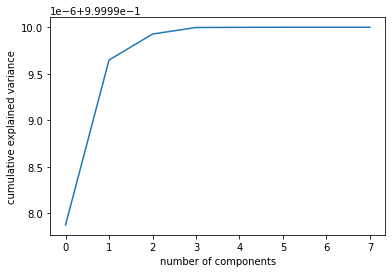

 Veo que con 1 solo componente puedo explicar el 95% de la varianza de los datos.


In [ ]:
from sklearn.decomposition import PCA

  ############
  ############ dimensionality reduction using PCA 
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


print(" Veo que con 1 solo componente puedo explicar el 95% de la varianza de los datos.")

In [ ]:

pca = PCA(n_components = 1).fit(X_train)
X_train_PC = pca.transform(X_train)
X_test_PC = pca.transform(X_test)

print('Cum Sum of variance explained by components', np.cumsum(pca.explained_variance_ratio_)[-1])


Cum Sum of variance explained by components 0.9999978735615839


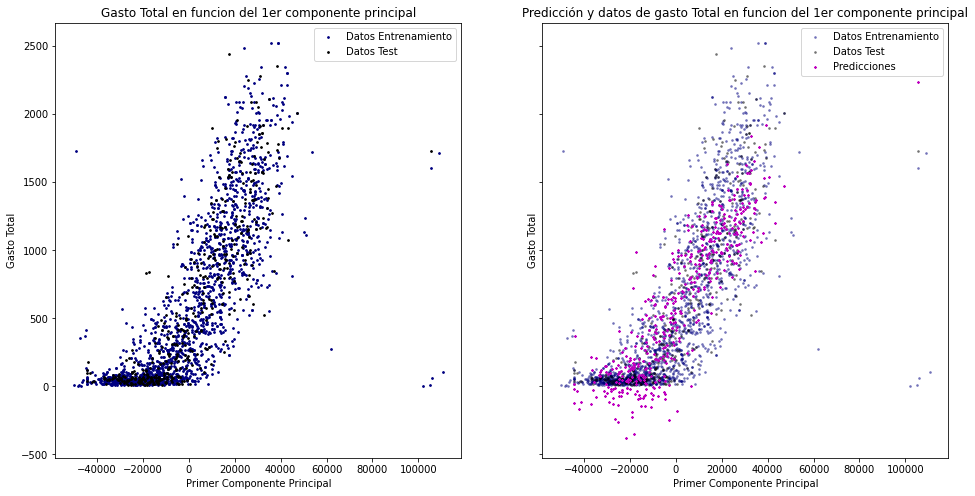

In [ ]:
# Grafico mis variabes X_test_PC contra Y_test 
fig , (ax1, ax2) = plt.subplots(1,2, figsize = (16,8), sharey = True)

ax1.set_title('Gasto Total en funcion del 1er componente principal')
ax1.scatter(X_train_PC, Y_train, c = 'navy', s = 3, label = 'Datos Entrenamiento')
ax1.scatter(X_test_PC, Y_test, c = 'k', s = 3, label = 'Datos Test')

ax1.set_xlabel("Primer Componente Principal")
ax1.set_ylabel('Gasto Total')
ax1.legend(loc = 'best')


ax2.set_title('Predicción y datos de gasto Total en funcion del 1er componente principal')

ax2.scatter(X_train_PC, Y_train, c = 'navy', s = 3, alpha = 0.4, label = 'Datos Entrenamiento')
ax2.scatter(X_test_PC, Y_test, c = 'k', s = 3, alpha = 0.4, label = 'Datos Test')
ax2.scatter(X_test_PC, predicciones, c = 'm', marker = 'x', s = 3,label = 'Predicciones')

ax2.set_xlabel("Primer Componente Principal")
ax2.set_ylabel('Gasto Total')
ax2.legend(loc = 'best')

Se puede apreciar a simple vista un buen ajuste del modelo a los datos de entrenamiento, especialmente para valores del 1er PC menores a 60000. Cabe notar que el modelo produce valores negativos de "Gasto Total", al aplicar este modelo a nuevos datos, se deberían tomar los valores negativos en la predicción, como valores nulos.

##**Regresion logistica** 

Nos interesa encontrar un modelo que determine cuales son las variables que explican si el clinete acepto o no la ultima campaña de marketing. Luego utilizar ese modelo para predecir la aceptación o no de futuras campañas.

Nuestra variable endógena es del tipo categórica binaria, y no podemos aplicar una regresion lineal dado que no se daran los supuestos de homocedasticidad y de normalidad.
El modelo que utilizaremos es una regresión logística: 

 * Variable endogena (Y): Response, variable binaria que indica si el cliente acepto o no la última campaña de marketing de la empresa (fracaso)
      * 0: no acepto la campaña
      * 1: acepto la campaña (exito)
 * Varables hexógena (X): Income, Recency,	NumWebVisitsMonth,Complain, Age,	Gasto_Total, Compras_Totales,	edu_cat, en_pareja	fam_num,	sum_acepta y Europeos.



### Planteamiento del modelo

In [ ]:
#Separamos las variables seleccionadas
df_logc = df_marketing.drop(['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome','Dt_Customer','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2',
       'MntSweetProducts', 'MntGoldProds','NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Education','Country'], axis = 1)


In [ ]:
# Número de observaciones de clases en 'Response'
df_logc.Response.value_counts().sort_index()

0    1879
1     333
Name: Response, dtype: int64

In [ ]:
# Porcentaje de observaciones por clase en 'Response'
df_logc.Response.value_counts(normalize=True).sort_index()

0    0.849458
1    0.150542
Name: Response, dtype: float64

Es un data set con clases no balanceadas ya que el 85% no acpeto la última campañan y el 15% si. 

In [ ]:
df_logc.columns.values

array(['Income', 'Recency', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Age', 'Gasto_Total', 'Compras_Totales', 'edu_cat', 'en_pareja',
       'fam_num', 'sum_acepta', 'Europeos'], dtype=object)

In [ ]:
df_logc.loc[df_logc['edu_cat'] == '0', 'edu_cat' ] = 'Nivel bajo 0'
df_logc.loc[df_logc['edu_cat'] == '1', 'edu_cat' ] = 'Nivel intermedio 1'
df_logc.loc[df_logc['edu_cat'] == '2', 'edu_cat' ] = 'Nivel alto 2'

In [ ]:
df_logc.loc[df_logc['sum_acepta'] == '0', 'sum_acepta' ] = '0 campañas'
df_logc.loc[df_logc['sum_acepta'] == '1', 'sum_acepta' ] = '1 campaña'
df_logc.loc[df_logc['sum_acepta'] == '2', 'sum_acepta' ] = '2 campañas'
df_logc.loc[df_logc['sum_acepta'] == '3', 'sum_acepta' ] = '3 campañas'
df_logc.loc[df_logc['sum_acepta'] == '4', 'sum_acepta' ] = '4 campañas'

In [ ]:
# Creamos variables dummys para estas dos variables categoricas no binarias
dummy = pd.get_dummies(df_logc[['edu_cat','sum_acepta']],drop_first=True)
dummy.head()

,edu_cat_1,edu_cat_2,sum_acepta_1,sum_acepta_2,sum_acepta_3,sum_acepta_4
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [ ]:
#Agregamos las dummys al df_logc
df_logc = pd.concat([df_logc, dummy], axis=1)
df_logc.head()

,Income,Recency,NumWebVisitsMonth,Response,Complain,Age,Gasto_Total,Compras_Totales,edu_cat,en_pareja,fam_num,sum_acepta,Europeos,edu_cat_1,edu_cat_2,sum_acepta_1,sum_acepta_2,sum_acepta_3,sum_acepta_4
0,70951.0,66,1,0,0,28,1198,17,0,1,2,0,0,0,0,0,0,0,0
1,57091.0,0,5,1,0,53,577,18,0,0,1,1,0,0,0,1,0,0,0
2,46098.0,86,8,0,0,37,120,11,1,0,3,0,0,1,0,0,0,0,0
3,25358.0,57,6,0,0,66,32,6,2,0,2,0,0,0,1,0,0,0,0
4,60491.0,81,5,0,0,42,1028,28,2,1,3,0,1,0,1,0,0,0,0


In [ ]:
df_logc = df_logc.drop(['edu_cat','sum_acepta'], axis = 1)
df_logc.head()


,Income,Recency,NumWebVisitsMonth,Response,Complain,Age,Gasto_Total,Compras_Totales,en_pareja,fam_num,Europeos,edu_cat_1,edu_cat_2,sum_acepta_1,sum_acepta_2,sum_acepta_3,sum_acepta_4
0,70951.0,66,1,0,0,28,1198,17,1,2,0,0,0,0,0,0,0
1,57091.0,0,5,1,0,53,577,18,0,1,0,0,0,1,0,0,0
2,46098.0,86,8,0,0,37,120,11,0,3,0,1,0,0,0,0,0
3,25358.0,57,6,0,0,66,32,6,0,2,0,0,1,0,0,0,0
4,60491.0,81,5,0,0,42,1028,28,1,3,1,0,1,0,0,0,0


In [ ]:
# Indicamos las variables independientes y de respuesta
y = df_logc['Response']
x = df_logc.drop(['Response'], axis = 1)



In [ ]:
#Observamos las variables independientes
x.head()

,Income,Recency,NumWebVisitsMonth,Complain,Age,Gasto_Total,Compras_Totales,en_pareja,fam_num,Europeos,edu_cat_1,edu_cat_2,sum_acepta_1,sum_acepta_2,sum_acepta_3,sum_acepta_4
0,70951.0,66,1,0,28,1198,17,1,2,0,0,0,0,0,0,0
1,57091.0,0,5,0,53,577,18,0,1,0,0,0,1,0,0,0
2,46098.0,86,8,0,37,120,11,0,3,0,1,0,0,0,0,0
3,25358.0,57,6,0,66,32,6,0,2,0,0,1,0,0,0,0
4,60491.0,81,5,0,42,1028,28,1,3,1,0,1,0,0,0,0


In [ ]:
#Observamos la variable dependiente
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Response, dtype: int64

In [ ]:
# División de los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(
                                                    x,  
                                                    y,  
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100
                                                    )

In [ ]:
#Ajuste con StatsModels

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.279866
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1531
Method:                           MLE   Df Model:                           16
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.3054
Time:                        04:17:10   Log-Likelihood:                -433.23
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 3.398e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3016      0.626     -2.078      0.038      -2.529      -0.074
Income  


* **Prueba de significatividad global:** 
      **Razon de Maxima Verosimilitud**
        * H0) β1 = β2 ...βn = 0
        * H1) Al menos un β es distinto de 0 

Con un nivel de significacia α = 5%, se rechaza la hipótesis nula de que todos los coeficientes son iguales a cero, por lo que el modelo planteado tiene variables que pueden ayudarnos a explicar si el cliente acepta o no la campaña, aunque este no sea el mejor modelo. 

* **Pseudo R-sque:** del modelo es 0,3054.

* **Prueba de significatividad individual:**  
     **Test de Wald:** 
        * H0) βi = 0
        * H1) βi ≠ 0
    
Analizando la significatividad individual de cada variable, se observa que hay seis variables que posee un P-value mayor a 5%: Income, Complain, Age, Compas_Totales, Europeso y edu_cat1 que no son estadisticamente significativas para el modelo. Como son pocas variables,vamos a quitarlas del modelo una a una, comenzando por la de mayor P-value, para observar la variación en los parametros.



### Mejorando el modelo

####Eliminamos edu_cat

In [ ]:
df_logc = df_logc.drop(['edu_cat_2','edu_cat_1'],axis = 1)

In [ ]:
# Indicamos las variables independientes y de respuesta
y = df_logc['Response']
x = df_logc.drop(['Response'], axis = 1)

In [ ]:
# División de los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(
                                                    x,  
                                                    y,  
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100
                                                    )

In [ ]:
#Ajuste con StatsModels

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.284589
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1533
Method:                           MLE   Df Model:                           14
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2937
Time:                        04:17:10   Log-Likelihood:                -440.54
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 1.472e-69
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3787      0.621     -2.220      0.026      -2.596      -0.161
Income  

#### Eliminamos Complain

In [ ]:
col = X_train.columns
col

Index(['const', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age',
       'Gasto_Total', 'Compras_Totales', 'en_pareja', 'fam_num', 'Europeos',
       'sum_acepta_1', 'sum_acepta_2', 'sum_acepta_3', 'sum_acepta_4'],
      dtype='object')

In [ ]:
col1 = col.drop('Complain', 1)
col1

Index(['const', 'Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Gasto_Total',
       'Compras_Totales', 'en_pareja', 'fam_num', 'Europeos', 'sum_acepta_1',
       'sum_acepta_2', 'sum_acepta_3', 'sum_acepta_4'],
      dtype='object')

In [ ]:
X_train1 = sm.add_constant(X_train[col1])

X_train = sm.add_constant(X_train1, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.284699
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1534
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2934
Time:                        04:17:10   Log-Likelihood:                -440.71
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 3.198e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3906      0.621     -2.241      0.025      -2.607      -0.174
Income  

#### Eliminamos Compas_totales

In [ ]:
col2 = col1.drop('Compras_Totales', 1)
col2

Index(['const', 'Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Gasto_Total',
       'en_pareja', 'fam_num', 'Europeos', 'sum_acepta_1', 'sum_acepta_2',
       'sum_acepta_3', 'sum_acepta_4'],
      dtype='object')

In [ ]:
X_train1 = sm.add_constant(X_train[col2])

X_train = sm.add_constant(X_train1, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.284917
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1535
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2929
Time:                        04:17:11   Log-Likelihood:                -441.05
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 7.856e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4178      0.622     -2.279      0.023      -2.637      -0.198
Income  

#### Eliminamos Income

In [ ]:
col3 = col2.drop('Income', 1)
col3

Index(['const', 'Recency', 'NumWebVisitsMonth', 'Age', 'Gasto_Total',
       'en_pareja', 'fam_num', 'Europeos', 'sum_acepta_1', 'sum_acepta_2',
       'sum_acepta_3', 'sum_acepta_4'],
      dtype='object')

In [ ]:
X_train1 = sm.add_constant(X_train[col3])

X_train = sm.add_constant(X_train1, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.285005
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1536
Method:                           MLE   Df Model:                           11
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2927
Time:                        04:17:11   Log-Likelihood:                -441.19
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 1.518e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6099      0.504     -3.194      0.001      -2.598      -0.622
Recency 

#### Eliminamos Age

In [ ]:
col4 = col3.drop('Age', 1)
col4

Index(['const', 'Recency', 'NumWebVisitsMonth', 'Gasto_Total', 'en_pareja',
       'fam_num', 'Europeos', 'sum_acepta_1', 'sum_acepta_2', 'sum_acepta_3',
       'sum_acepta_4'],
      dtype='object')

In [ ]:
X_train1 = sm.add_constant(X_train[col4])

X_train = sm.add_constant(X_train1, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.285398
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1537
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2917
Time:                        04:17:11   Log-Likelihood:                -441.80
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 4.431e-72
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9037      0.429     -4.433      0.000      -2.745      -1.062
Recency 

#### Eliminamos Europeos

In [ ]:
col5 = col4.drop('Europeos', 1)
col5

Index(['const', 'Recency', 'NumWebVisitsMonth', 'Gasto_Total', 'en_pareja',
       'fam_num', 'sum_acepta_1', 'sum_acepta_2', 'sum_acepta_3',
       'sum_acepta_4'],
      dtype='object')

In [ ]:
X_train1 = sm.add_constant(X_train[col5])

X_train = sm.add_constant(X_train1, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.285767
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1538
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2908
Time:                        04:17:11   Log-Likelihood:                -442.37
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 1.183e-72
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7807      0.412     -4.318      0.000      -2.589      -0.972
Recency 

Prueba de significatividad global:
**Razon de Maxima Verosimilitud**
  * H0) β1 = β2 ...βn = 0
  * H1) Al menos un β es distinto de 0 
Con un nivel de significacia α = 5%, se rechaza la hipotesis nula de que todos los coeficientes son iguales a cero, por lo que el modelo es adecuado para explicar si los clintes aceptan o no la campaña de marketing.

Con el modelo final se obtiene un Pseudo R-sque de 29%, un poco menor que el del primer modelo. Sin embar, esta no es una medida muy representantiva en la regresion logisitca.

Prueba de significatividad individual:

**Test de Wald**

  * H0) βi = 0
  * H1) βi ≠ 0
  
Nos hemos quedado con las variables significativas, es decir aquellas que presentan en su prueba individual un P-value menor a un α = 5%.
Pero observamos que los coeficientes de sum_acepta son muy grandes, por lo tanto el error cuadrado tambien es grande y podriamos estar rechazando la hipotesis nula sin que esto sea asi. Vamos a probar un modelo sin esta variable y ver las diferencias.


#### Eliminamos sum_acepta

In [ ]:
df_logc_prueba = df_logc.drop(['sum_acepta_1', 'sum_acepta_2', 'sum_acepta_3',
       'sum_acepta_4','Europeos','Income','Complain','Age','Compras_Totales'],axis = 1)

In [ ]:
# Indicamos las variables independientes y de respuesta
y1 = df_logc_prueba['Response']
x1 = df_logc_prueba.drop(['Response'], axis = 1)

In [ ]:
# División de los datos en train y test

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
                                                    x1,  
                                                    y1,  
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100
                                                    )

In [ ]:
#Ajuste con StatsModels

X_train_1 = sm.add_constant(X_train_1, prepend=True)
modelo = sm.Logit(endog=y_train_1, exog=X_train_1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.326531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.1896
Time:                        04:17:11   Log-Likelihood:                -505.47
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 4.185e-49
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6384      0.378     -4.337      0.000      -2.379      -0.898
Recency 

Observamos que a nivel general el modelo, disminuye el Pseudo R-squ, aumenta el estadistico Log-Likelihood y si bien el P-Value continua siendo menor a un α = 5%, consideramos que es adecuado dejar la variable sum_acepta.

###Odd Ratio

Se observa que tres variables se relacionan negativamente con la probablidad de exito (aceptar la campaña), ya que poseen un coeficiente β negativo: Income, en_pareja, fam_num.  


In [ ]:
coef = {    'Recency': -0.0258,
            'NumWebVisitsMonth': 0.1972,
            'Gasto_Total' :0.0008,
            'en_pareja': -0.9165,
            'fam_num': -0.3021,
            'sum_acepta_1' : 1.4607,
            'sum_acepta_2' : 2.5031,
            'sum_acepta_3' : 4.0529 ,
            'sum_acepta_4' : 3.5918,
       }

e = math.e
print('ODD Ratio')

for key , value in coef.items():
  print(f'{key}: {round(((e ** value)-1)*100,2)}%')

ODD Ratio
Recency: -2.55%
NumWebVisitsMonth: 21.8%
Gasto_Total: 0.08%
en_pareja: -60.01%
fam_num: -26.07%
sum_acepta_1: 330.9%
sum_acepta_2: 1122.03%
sum_acepta_3: 5656.42%
sum_acepta_4: 3529.94%


Por cada día que el cliente tarda en hacer una compra, las chanses de aceptar la campaña se reducen en 2,55%.
Por cada visita que realiza el cliente al citio web de la compañia, las chanses de aceptar la campaña aumentan un 21,8%.
Por cada peso adicional que el cliente gasta, aumentan las chanses de aceptar la campaña en 0,08% muy poquito.
El hecho de estar en pareja, reduce las chanses de aceptar la campaña en un  60%.
Por cada integrante adicional en la familia, las chanses de aceptar la campañan se reducen en 26,07%.
Por cada campaña adicional que se acepte se incrementa las chanses de aceptar otra.

### Predicciones
Creamos nuevos datasets de train y test que no contengan las columnas 'Complain', 'Compras_Totales', 'Income','Age' y 'Europeos'

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
print(X_train)

      const  Recency  ...  sum_acepta_3  sum_acepta_4
1378    1.0        5  ...             0             0
1323    1.0       73  ...             0             0
537     1.0       52  ...             0             0
1910    1.0       12  ...             0             0
874     1.0       90  ...             0             0
...     ...      ...  ...           ...           ...
353     1.0       92  ...             0             0
1954    1.0       97  ...             0             0
79      1.0       59  ...             0             0
1883    1.0        8  ...             0             0
1561    1.0       33  ...             0             0

[1548 rows x 10 columns]


In [ ]:
X_test = X_test.drop(['Complain', 'Compras_Totales', 'Income','Age','Europeos'], axis=1)
X_test = sm.add_constant(X_test, prepend=True)
print(X_test)

      const  Recency  ...  sum_acepta_3  sum_acepta_4
403     1.0       56  ...             0             0
1305    1.0       83  ...             0             0
1751    1.0       53  ...             0             0
2148    1.0       72  ...             0             0
2145    1.0       28  ...             0             0
...     ...      ...  ...           ...           ...
1549    1.0       34  ...             0             0
1521    1.0       67  ...             0             0
547     1.0       55  ...             0             0
1507    1.0       18  ...             0             0
1777    1.0       96  ...             0             0

[664 rows x 10 columns]


In [ ]:
print(X_test.columns)
print(X_train.columns)

Index(['const', 'Recency', 'NumWebVisitsMonth', 'Gasto_Total', 'en_pareja',
       'fam_num', 'sum_acepta_1', 'sum_acepta_2', 'sum_acepta_3',
       'sum_acepta_4'],
      dtype='object')
Index(['const', 'Recency', 'NumWebVisitsMonth', 'Gasto_Total', 'en_pareja',
       'fam_num', 'sum_acepta_1', 'sum_acepta_2', 'sum_acepta_3',
       'sum_acepta_4'],
      dtype='object')


In [ ]:
# Predicción de probabilidades
#Volvemos a entrenar el modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.285767
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1548
Model:                          Logit   Df Residuals:                     1538
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2908
Time:                        04:17:11   Log-Likelihood:                -442.37
converged:                       True   LL-Null:                       -623.75
Covariance Type:            nonrobust   LLR p-value:                 1.183e-72
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7807      0.412     -4.318      0.000      -2.589      -0.972
Recency 

In [ ]:
#Predigo sobre el conjunto de test
predicciones = modelo.predict(X_test)

#Clasificacion
clasificacion = np.where(predicciones<0.30, 0, 1)
clasificacion

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
# Porcentaje de concordancia

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El porcentaje de concordnacia del test es: {100*accuracy}%")


El porcentaje de concordnacia del test es: 84.1867469879518%


 Matriz de Confusion: 


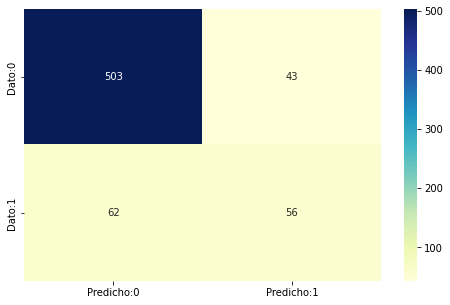

In [ ]:
# Matriz de confusion
cm = confusion_matrix(y_test, clasificacion)
print (" Matriz de Confusion: ")
conf_matrix=pd.DataFrame(data=cm,columns=['Predicho:0','Predicho:1'],index=['Dato:0','Dato:1'])
plt.figure(figsize = (8,5))
sbn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");



In [ ]:
#Sensibilidad y especificidad
VN=cm[0,0]
VP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensibilidad=VP/float(VP+FN)
especificidad=VN/float(VN+FP)

print(f' La sensibilidad es: {sensibilidad*100}% \n La especificidad es: {especificidad*100}%')

 La sensibilidad es: 47.45762711864407% 
 La especificidad es: 92.12454212454212%


Train/Test split results:
 Accuracy is 0.842
 log_loss is 5.462
 auc is 0.847


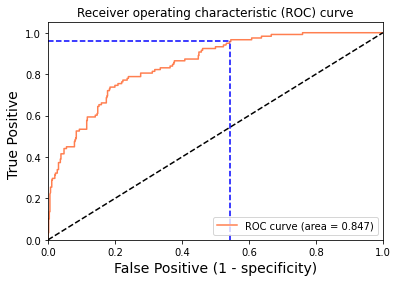

Using a threshold of 0.049 guarantees a sensitivity of 0.958 and a specificity of 0.458, i.e. a false positive rate of 54.21%.


In [ ]:
#Curva ROC   
[fpr, tpr, thr] = roc_curve(y_test, predicciones)
print('Train/Test split results:')
print(" Accuracy is %2.3f" % accuracy_score(y_test, clasificacion))
print(" log_loss is %2.3f" % log_loss(y_test, clasificacion))
print(" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive (1 - specificity)', fontsize=14)
plt.ylabel('True Positive ', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


##**Arbol de decisión**

In [ ]:
# Métodos de aprendizaje automático
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

Por ultimo, entrenaremos arboles de decisión y evaluaremos su desempeño. Nos interesa especialmente la capacidad de visualizar la partición de los datos. Ya que nos brinda aun mas información sobre nuestras variables y su relación con la variable objetivo.

En este caso, tomaremos nuevamente como variable objetivo a *Income*. 

Para entrenar al modelo tomaremos variables númericas y categóricas.

Variables numéricas: 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Gasto_Total',
       'Compras_Totales'



Variables categóricas: 'En_pareja', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'sum_acepta', 'Educ_cat','num_fam'




In [ ]:
#preparo las variables numéricas que usaré
df_num_nuevas = df_numericas.drop(['Year_Birth', 'Dt_Customer'], inplace = False, axis = 1)

In [ ]:
print(df_num_nuevas.shape, 'df_num_nuevas shape')
print(df_num_nuevas.columns, 'df_num_nuevas columnas')
print(df_num_nuevas.head(5))


(2212, 16) df_num_nuevas shape
Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Gasto_Total',
       'Compras_Totales'],
      dtype='object') df_num_nuevas columnas
    Income  Recency  MntWines  ...  Age  Gasto_Total  Compras_Totales
0  70951.0       66       239  ...   28         1198               17
1  57091.0        0       464  ...   53          577               18
2  46098.0       86        57  ...   37          120               11
3  25358.0       57        19  ...   66           32                6
4  60491.0       81       637  ...   42         1028               28

[5 rows x 16 columns]


In [ ]:
print(df_marketing['fam_num'])

0       2
1       1
2       3
3       2
4       3
       ..
2235    2
2236    2
2237    2
2238    4
2239    1
Name: fam_num, Length: 2212, dtype: int64


Al preparar las variables categoricas notamos que dos de ellas son variables categóricas de mas de 2 valores, y solo una es una variable binaria (*en_pareja*)

A las variables categoricas *fam_num* y *edu_cat* les haremos una transformación usando One-Hot Encoding. Para cada uno de los valores posibles de esa variable, se creará una variable binaria con la siguiente condición: Estas nuevas variables valdran 1 cuando la variable original tome el valor correspondiente, y 0 en el resto de los casos.



In [ ]:
## Ahora preparamos las variables categoricas
df_categ_nuevas = df_marketing[['edu_cat', 'en_pareja',	'fam_num']]
columnas_categ_nuevas = ['Educ_categorias', 'En_pareja', 'Integrantes_fam']
df_categ_nuevas.columns = columnas_categ_nuevas

# 'En_pareja' es variable binarias, por lo que no necesita ninguna transformación
# Las variables 'Educ_categorias'y 'Integrantes_fam' deben ser transformadas a One Hot encoding

onehot_encoder = OneHotEncoder(sparse= False)

df_categ_onehot = df_categ_nuevas.join(df_acepta)

for col in ['Educ_categorias', 'Integrantes_fam']:
  columna = df_categ_nuevas[col]
  len_col = len(columna)
  columna = np.reshape(list(columna), (len_col, 1))
  columnas_onehot = onehot_encoder.fit_transform(columna)
  onehot_labels = range(1,columnas_onehot.shape[1]+1)
  nombres_columnas = ["{}_{}".format(col, colcat) for colcat in onehot_labels]
  df_columnas_onehot = pd.DataFrame(columnas_onehot, columns= nombres_columnas, index = df_categ_nuevas.index)
  df_categ_onehot = pd.concat([df_categ_onehot, df_columnas_onehot], axis = 1)
#Saco de mi dataset las variables originales, dejando solo las binarias y las one hot encoded
df_categ_onehot.drop(columns = ['Educ_categorias', 'Integrantes_fam'], inplace= True)

df_categ_onehot = df_categ_onehot.astype('int32')
print(df_categ_onehot)
print(df_categ_onehot.columns)


      En_pareja  AcceptedCmp1  ...  Integrantes_fam_4  Integrantes_fam_5
0             1             0  ...                  0                  0
1             0             0  ...                  0                  0
2             0             0  ...                  0                  0
3             0             0  ...                  0                  0
4             1             0  ...                  0                  0
...         ...           ...  ...                ...                ...
2235          0             0  ...                  0                  0
2236          1             0  ...                  0                  0
2237          0             0  ...                  0                  0
2238          1             0  ...                  1                  0
2239          0             0  ...                  0                  0

[2212 rows x 15 columns]
Index(['En_pareja', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'Accept

In [ ]:
#Agrego las variables de aceptación de campaña
print(df_categ_onehot.columns)

y = df_categ['Response']

print('Hay nan en y :', y.isnull().values.any())
print(y.shape, 'y shape')


#Armo el array X con todos los datos que mantuvimos en el dataset hasta ahora
X =  pd.concat([df_categ_onehot, df_num_nuevas], axis=1, join="inner")

print('Hay nan en X :', X.isnull().values.any())
print(X.shape, 'X shape')
print(X.columns)


Index(['En_pareja', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'sum_acepta', 'Educ_categorias_1',
       'Educ_categorias_2', 'Educ_categorias_3', 'Integrantes_fam_1',
       'Integrantes_fam_2', 'Integrantes_fam_3', 'Integrantes_fam_4',
       'Integrantes_fam_5'],
      dtype='object')
Hay nan en y : False
(2212,) y shape
Hay nan en X : False
(2212, 31) X shape
Index(['En_pareja', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'sum_acepta', 'Educ_categorias_1',
       'Educ_categorias_2', 'Educ_categorias_3', 'Integrantes_fam_1',
       'Integrantes_fam_2', 'Integrantes_fam_3', 'Integrantes_fam_4',
       'Integrantes_fam_5', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Gasto_Total', 'Comp

In [ ]:
#Separo en conjuntos de train (80%) y val (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state=42)


La accuracy al predecir sobre el conjunto de entrenamiento es:  99.32 %
La accuracy al predecir sobre el conjunto de validación es:  84.2 %


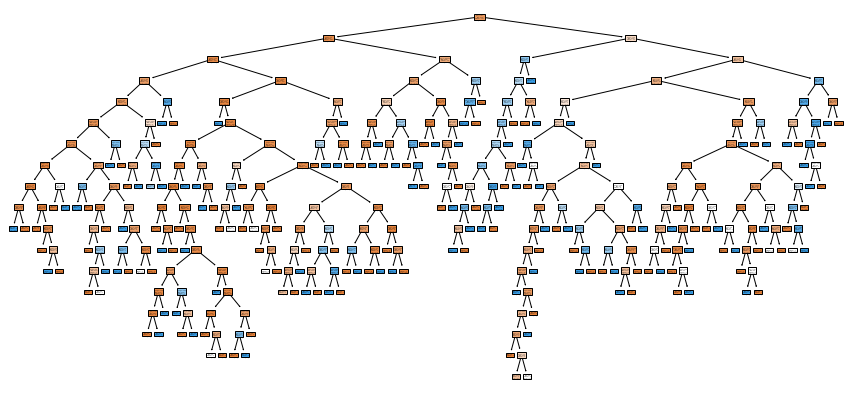

In [ ]:
#armamos el árbol de decisión
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
print("La accuracy al predecir sobre el conjunto de entrenamiento es: ",round(100*accuracy_score(y_train, clf.predict(X_train)), 2), "%")
print("La accuracy al predecir sobre el conjunto de validación es: ",round(clf.score(X_val,y_val)*100,2),"%")
#graficamos
plt.figure(figsize=(15,7))
tree.plot_tree(clf,
               filled=True)
plt.show()

Ahora intentaremos mejorar el arbol, ya sea aumentando la precision en sus predicciones o simplificando su estructura.

Para comenzar trataremos de encontrar un valor de alfa apropiado, que nos permita reducir la cantidad de nodos del modelo sin perder demasiado poder de predicción. 

Esto nos solo nos resulta importante para poder visualizar el modelo, sino que ayudará a reducir el overfitting. Esto lo podemos observar en la amplia diferencia entre la accuracy de entrenamiento y de validación.

In [ ]:

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

En este gráfico podemos ver como crece la impureza total del modelo al aumentar el valor de alfa
Descartaremos el último valor posible de alfa, ya que este nos proporcionaría un arbol trivial con 1 solo nodo


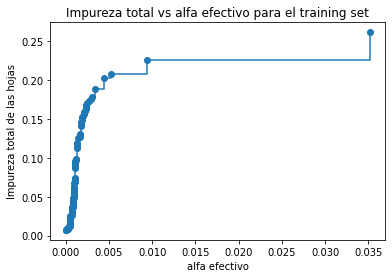

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:], impurities[:], marker='o', drawstyle="steps-post")
ax.set_xlabel("alfa efectivo")
ax.set_ylabel("Impureza total de las hojas")
ax.set_title("Impureza total vs alfa efectivo para el training set")

print('En este gráfico podemos ver como crece la impureza total del modelo al aumentar el valor de alfa')
print('Descartaremos el último valor posible de alfa, ya que este nos proporcionaría un arbol trivial con 1 solo nodo')

ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

El mejor valor de accuracy en el set de validación se obtiene con un alpha = 0.0019


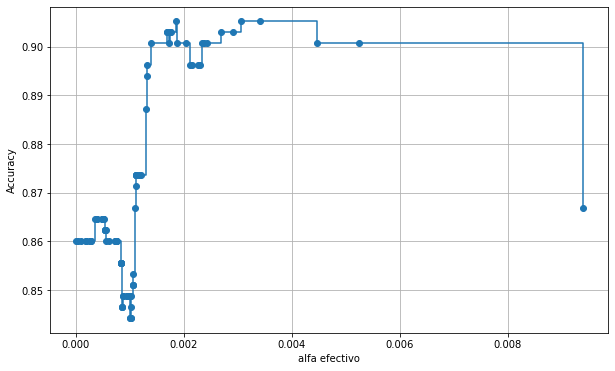

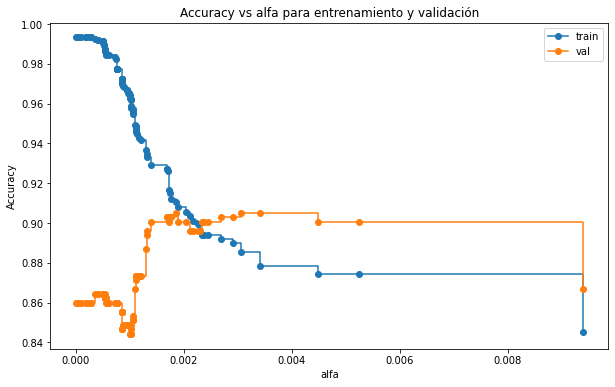

En este gráfico se puede apreciar la reducción en el sobreajuste al aumentar alfa


In [ ]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs[:-1]]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas, acc_scores, marker='o', drawstyle="steps-post")
plt.xlabel("alfa efectivo")
plt.ylabel("Accuracy")


mej_acc_ind = np.argmax(acc_scores)
mej_alfa = ccp_alphas[mej_acc_ind]

print(f"El mejor valor de accuracy en el set de validación se obtiene con un alpha = {round(mej_alfa,4)}")


train_scores = [clf.score(X_train, y_train) for clf in clfs[:-1]]
test_scores = [clf.score(X_val, y_val) for clf in clfs[:-1]]

fig, ax = plt.subplots(1, figsize = (10,6))
ax.set_xlabel("alfa")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alfa para entrenamiento y validación")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="val",
        drawstyle="steps-post")
ax.legend()
plt.show()


print('En este gráfico se puede apreciar la reducción en el sobreajuste al aumentar alfa')

La profundidad del arbol de alfa = 0.0019 es de 7


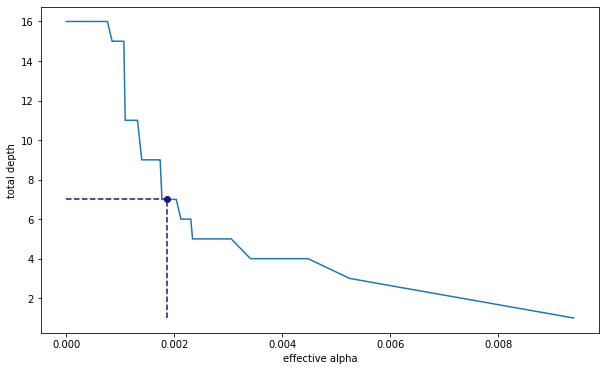

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs[:-1]]
mej_prof = tree_depths[mej_acc_ind]

plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas, tree_depths)
plt.xlabel("effective alpha")
plt.ylabel("total depth")
plt.plot([mej_alfa], [mej_prof], marker = 'o', color = 'midnightblue')
plt.hlines(mej_prof, min(ccp_alphas), mej_alfa, linestyles='dashed', color = 'midnightblue')
plt.vlines(mej_alfa, min(tree_depths), mej_prof, linestyles='dashed', color = 'midnightblue')

print(f"La profundidad del arbol de alfa = {round(mej_alfa,4)} es de {mej_prof}")

La accuracy sobre el conjunto de validación es :  90.52 %


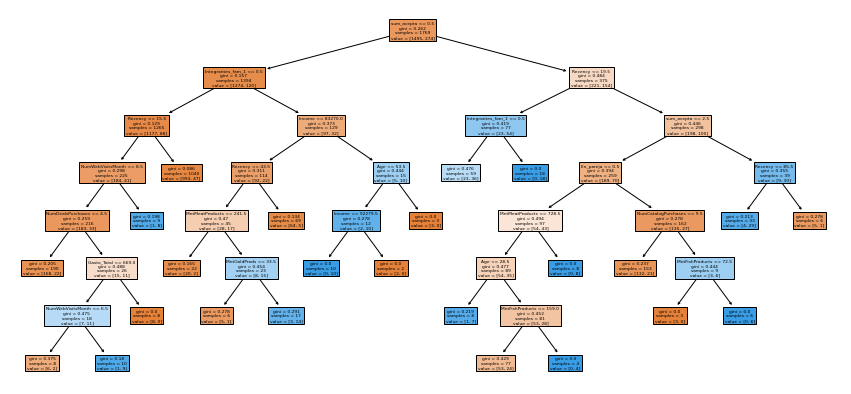

In [ ]:
# Creo un arbol con estos hiperparametros
model = DecisionTreeClassifier(random_state=42, max_depth=mej_prof, ccp_alpha= mej_alfa).fit(X_train,y_train)

print("La accuracy sobre el conjunto de validación es : ",round(model.score(X_val,y_val)*100,2),"%")
#graficamos
plt.figure(figsize=(15,7))
tree.plot_tree(model,
               filled=True,
               feature_names = [col for col in X.columns])
plt.show()

Podemos ver como la accuracy sobre el conjunto de validación aumentó a 90%.


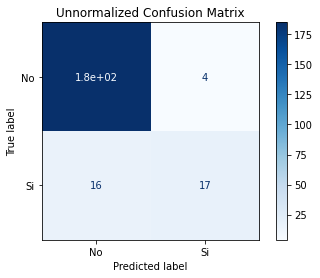

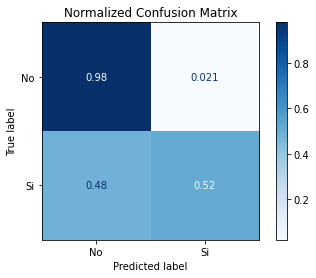

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                  display_labels=['No', 'Si'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

Podemos observar en la matriz de confusion normalizada, que solo un 52% de los clientes que aceptaron la campaña, son correctamente predichos. Esto no es ideal pero nos parece un buen nivel de predicción para datos tan desbalanceados como lo es la variable **Response**

In [ ]:
y_pred_decsT = model.predict(X_val)

# Report
print(classification_report(y_pred_decsT,y_val, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_decsT,y_val))

              precision    recall  f1-score   support

           0      0.971     0.923     0.947       404
           1      0.475     0.718     0.571        39

    accuracy                          0.905       443
   macro avg      0.723     0.821     0.759       443
weighted avg      0.928     0.905     0.914       443

accuracy:  0.9051918735891648


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#Busco los mejores hiperparametros para mi arbol de decisión
pipe_decsT = Pipeline([
    ('sc', StandardScaler()),
    ('decsT', DecisionTreeClassifier())
    ])

params_decsT = {
    'decsT__criterion' : ['gini', 'entropy'],
    'decsT__max_depth' : np.arange(2, 4),
    'decsT__ccp_alpha' : ccp_alphas,
    }

search_decsT = GridSearchCV(estimator=pipe_decsT,
                      param_grid=params_decsT,
                      cv = 5,
                      return_train_score=True)

search_decsT.fit(X_train, y_train)
best_param = search_decsT.best_params_
print(f" El mejor score es: {search_decsT.best_score_} con parametros: {best_param}")

 El mejor score es: 0.8581104655815368 con parametros: {'decsT__ccp_alpha': 0.0, 'decsT__criterion': 'gini', 'decsT__max_depth': 3}


Notamos aquí que el score sobre el conjunto de entrenamiento es menor, pero nos parece interesante ver si mejora la capacidad predictiva sobre datos de validación.

In [ ]:
# Creo un arbol con estos hiperparametros
decsT = DecisionTreeClassifier(random_state=42, max_depth=best_param['decsT__max_depth'], criterion = best_param['decsT__criterion'], ccp_alpha = best_param['decsT__ccp_alpha']).fit(X_train,y_train)
decsT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

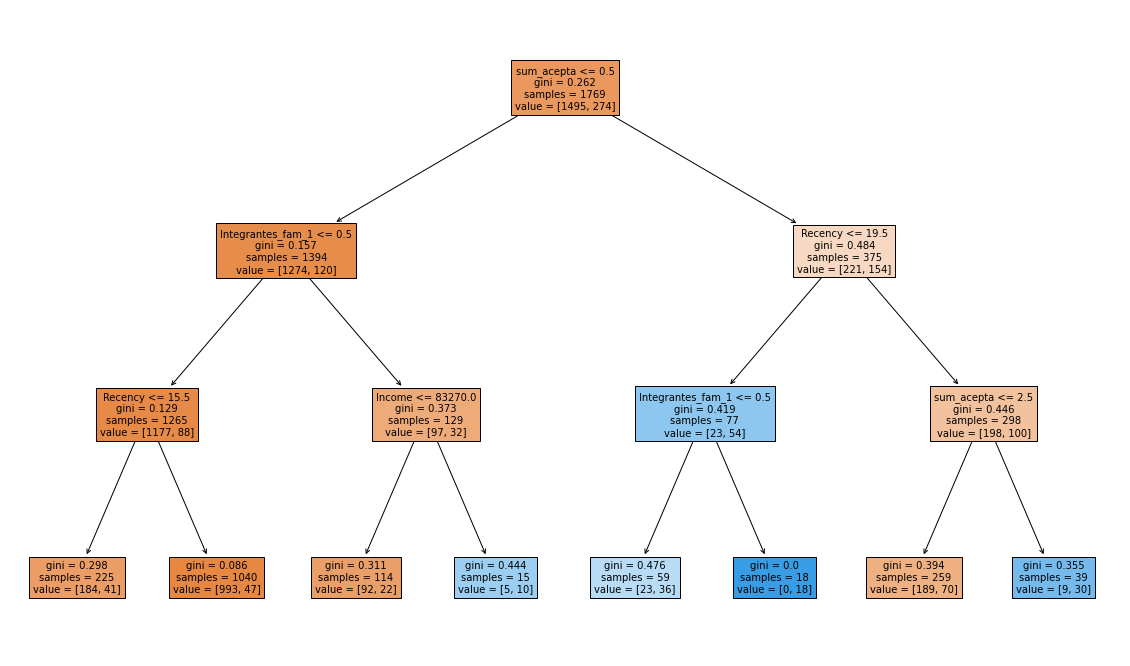

In [ ]:
#graficamos
plt.figure(figsize=(20,12))
tree.plot_tree(decsT,
               filled=True,
               feature_names = [col for col in X.columns])
plt.show()

Podemos ver en la figura, que ahora tenemos 4 hojas terminales correspondientes a la categoría **SI acepta**.


1.   Clientes que aceptaron 1 o 2 campañas previas, y que realizaron su última compra hace mas de 20 días.

2.   Clientes que aceptaron 1 o mas campañas previas y realizaron una compra en los últimos 20 días. Dentro de los cuales se distingue entre clientes que no viven solos y clientes que no viven solos (este último grupo son 18 clientes que todos aceptan la campaña)

3.   Clientes que no aceptaron campañas pasadas, que viven solos (integrantes_fam_1 = 1 nos indica que la variable fam_num vale 1) y que tienen ingresos mayores a 83270 euros.


Viendo la estructura del arbol y los coeficientes GINI, podemos concluir que las variables mas relevantes a la hora de predecir la aceptación de la última campaña son **sum_acepta**, **recency** y en menor medida, **Income**.




In [ ]:
# Report
y_pred_decsT = decsT.predict(X_val)
print(classification_report(y_pred_decsT,y_val, digits = 3))
print('val accuracy: ', metrics.accuracy_score(y_pred_decsT,y_val))

              precision    recall  f1-score   support

           0      0.982     0.904     0.941       417
           1      0.322     0.731     0.447        26

    accuracy                          0.894       443
   macro avg      0.652     0.817     0.694       443
weighted avg      0.943     0.894     0.912       443

val accuracy:  0.8939051918735892


Aquí podemos observar que la precisión de la categoría **Si acepta** mejoró ligeramente, tambien vemos que se categorizaron correctamente **5** clientes mas. Dada la poca cantidad de clientes de esa categoría que hay en el dataset, nos parece un aumento considerable en la precisión del modelo.


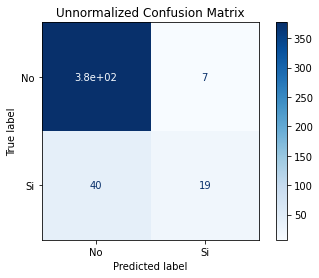

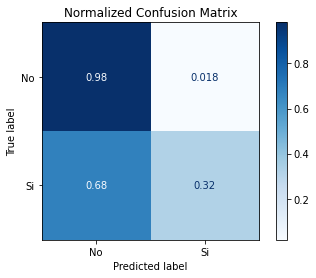

In [ ]:

titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(decsT, X_val, y_val,
                                  display_labels=['No', 'Si'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

Finalmente vemos en la matriz de confusión, que ahora la solo el 32% de los clientes pertenecientes a la categoría **SI acepta** son correctamente clasificados por el modelo.

Podemos concluir que este modelo obtenido mediante una busqueda GridSearchCV usando  5-fold cross-validation y buscando encontrar los mejores valores para los paramétros: Max_depth, ccp_alpha, Criterion; tiene una capacidad predictiva menor que el modelo en donde se buscó solamente el mejor valor de alfa y max_depth. 
